In [1]:
import pandas as pd
import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



Matplotlib created a temporary config/cache directory at /scratch/slurm-job.3803994/matplotlib-cbb7ivvh because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# TODO REFACTOR IN FUNCTIONS

In [3]:
def barplot_3_lines(tmp_plot, col1, col2, col3, x_var, sample_type, save_suffix, base_plot, save):
    plt.figure(figsize = (20, 6))#set the width of the bars
    plt.grid()
    font_labels = 12
    pos_text_y = 6
    lw = 2
    ms = 6
    # plot bars in stack manner
    ax1 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col1], markersize = ms,
                  color='r', marker= 's', linewidth=lw, label = col1, alpha=0.7)
    ax2 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col2], markersize = ms,
                  color='g',  marker= 'v', linewidth=lw, label = col2, alpha=0.7)
    ax3 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col3], markersize = ms,
                  color='b', marker= 'o', linewidth=lw, label = col3, alpha=0.7)
    
    plt.xticks(rotation=90, ticks=np.arange(len(tmp_plot[x_var])),
               labels=tmp_plot[x_var],  fontsize=font_labels + 2 ) 
    
    plt.yticks(fontsize=font_labels + 2) 
    plt.legend(loc='upper left', fontsize=font_labels)  #,  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#     for r1, r2, r3 in zip(ax1, ax2, ax3):
#         h1 = r1.get_height()
#         h2 = r2.get_height()
#         h3 = r3.get_height()
#         upset = 0.7
#         plt.text(r1.get_x() + r1.get_width() / 2., h1 + upset , "%d" % h1, 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
#         plt.text(r2.get_x() + r2.get_width() / 2., h2 + upset , "%d" % h2 , 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
#         plt.text(r3.get_x() + r3.get_width() / 2., h3 + upset , "%d" % h3, 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
    plt.title(sample_type, fontsize=font_labels + 2)
    plt.ylabel('Number of unique SNS validated peptide', fontsize=font_labels + 3)
    name = f'Compare_SNSmethods_{sample_type}_{save_suffix}'
    save_path = os.path.join(base_plot, f'{name}.pdf')
    print(save_path)
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() # write function

In [4]:
def barplot_3_bars(tmp_plot, col1, col2, col3, x_var, sample_type, save_suffix, base_plot, save):

    plt.figure(figsize = (20, 6))#set the width of the bars
    font_labels = 12
    pos_text_y = 6
    w = 0.2
    # plot bars in stack manner
    ax1 = plt.bar(np.arange(len(tmp_plot[x_var])), tmp_plot[col1], width=w,
                  color='darkkhaki', edgecolor= 'k', linewidth=0.7, label = col1)
    ax2 = plt.bar(np.arange(len(tmp_plot[x_var])) + 0.2, tmp_plot[col2], width=w,
                  color='orange',  edgecolor= 'k', linewidth=0.7, label = col2)
    ax3 = plt.bar(np.arange(len(tmp_plot[x_var])) + 0.4, tmp_plot[col3], width=w,
                  color='lightblue', edgecolor= 'k', linewidth=0.7, label = col3)
    plt.xticks(rotation=90, ticks=np.arange(len(tmp_plot[x_var])) + 0.3,
               labels=tmp_plot[x_var],  fontsize=font_labels + 2 ) 
    plt.yticks(fontsize=font_labels + 2) 
    plt.legend(loc='upper left', fontsize=font_labels)  #,  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
    for r1, r2, r3 in zip(ax1, ax2, ax3):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h3 = r3.get_height()
        upset = 0.7
        plt.text(r1.get_x() + r1.get_width() / 2., h1 + upset , "%d" % h1, 
                 ha="center", va="bottom", color="black", fontsize=font_labels)
        plt.text(r2.get_x() + r2.get_width() / 2., h2 + upset , "%d" % h2 , 
                 ha="center", va="bottom", color="black", fontsize=font_labels)
        plt.text(r3.get_x() + r3.get_width() / 2., h3 + upset , "%d" % h3, 
                 ha="center", va="bottom", color="black", fontsize=font_labels)

    plt.ylabel('Number of unique kmer candidates', fontsize=font_labels + 3)
    name = f'Filtering_2pipelines_kmers_{sample_type}_{save_suffix}'
    save_path = os.path.join(base_plot, f'{name}.pdf')
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() # write function

In [5]:
def reader_assign_conf(path, FDR_threshold):
    print(f'Reading {path}')
    df = pd.read_csv(path, sep = '\t')
    print(f'With Shape: {df.shape[0]}')
    assert('delta_cn' in df.columns)
    df_filtered = df.loc[df['tdc q-value'] < FDR_threshold]
    print(f'Number of validated psm: {df_filtered.shape}')
    val = len(set(df_filtered['unmodified sequence']))
    val_rate = val / len(set(df['unmodified sequence']))
    print(f'Number of validated unique peptides: {val}')
    print(f'Validation Rate: {np.round(val_rate * 100 , 2)} percent')
    return val, val_rate, df_filtered

In [77]:
# INPUTS 
basedir = '/cluster/work/grlab/projects/projects2020_OHSU/proteomics'
pipelines = ['OHSU', 'ETH']
samples = ['TCGA-C8-A12P-01A-11R-A115-07',
          'TCGA-AO-A0JM-01A-21R-A056-07',
          'TCGA-BH-A18V-01A-11R-A12D-07',
          'TCGA-A2-A0D2-01A-21R-A034-07',
          'TCGA-A2-A0SX-01A-12R-A084-07', 
          'TCGA-25-1319-01A-01R-1565-13',
          'TCGA-25-1313-01A-01R-1565-13',
          'TCGA-61-2008-01A-02R-1568-13',
          'TCGA-24-1431-01A-01R-1566-13',
          'TCGA-24-2298-01A-01R-1569-13']
#samples = samples[-2:-1]
print(samples)
FDR_limit = 0.05

['TCGA-C8-A12P-01A-11R-A115-07', 'TCGA-AO-A0JM-01A-21R-A056-07', 'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-A2-A0D2-01A-21R-A034-07', 'TCGA-A2-A0SX-01A-12R-A084-07', 'TCGA-25-1319-01A-01R-1565-13', 'TCGA-25-1313-01A-01R-1565-13', 'TCGA-61-2008-01A-02R-1568-13', 'TCGA-24-1431-01A-01R-1566-13', 'TCGA-24-2298-01A-01R-1569-13']


# Parse: results for all experiments

In [78]:
results = {'sample':[], 'experiment': [], 'pipeline': [],
           '#peptides_FDR_single': [], '#peptides_FDR_poolExp': [],  '#peptides_FDR_poolExp_unionPipelines': [], 
          'valRate_FDR_single': [], 'valRate_FDR_poolExp': [],  'valRate_FDR_poolExp_unionPipelines': []}


for sample in samples:
    sample = '-'.join(sample.split('-')[0:3])
    for pipeline in pipelines:
        path_single = os.path.join(basedir, pipeline, sample, 'assign_conf_per_experiment')
        path_pool_pipeline = os.path.join(basedir, pipeline, sample, 'assign_conf_pooled_FDR')
        path_pool_union = os.path.join(basedir, f'assign_conf_joint_to_{pipeline}', sample)
        path_test_OHSU = os.path.join(basedir, 'OHSU', sample, 'assign_conf_per_experiment')
        path_test_ETH = os.path.join(basedir, 'ETH', sample, 'assign_conf_per_experiment')
        experiment_list = [ i.split('/')[-1] for i in glob.glob(path_single + '/*')]

        for experiment in experiment_list:
            if pipeline == 'OHSU':
                original_name = experiment
                cut_name = experiment[1:]
            else:
                original_name = experiment
                cut_name = experiment
               
            if os.path.isfile(os.path.join(path_test_OHSU, 'J' + cut_name, 'assign-confidence.target.txt')) and \
                os.path.isfile(os.path.join(path_test_ETH, cut_name, 'assign-confidence.target.txt')): 
                results['pipeline'].append(pipeline)
                results['sample'].append(sample)
                results['experiment'].append(cut_name) 
                
                # search 1 experiment, 1 pipeline  
                df_single = os.path.join(path_single, original_name, 'assign-confidence.target.txt')
                val, val_rate, _ = reader_assign_conf(df_single, FDR_limit)
                results['#peptides_FDR_single'].append(val)
                results['valRate_FDR_single'].append(val_rate)

                # search all experiments, 1 pipeline
                df_pool_pipeline = os.path.join(path_pool_pipeline, f'tsearch-{original_name}.txt')
                val, val_rate, _ = reader_assign_conf(df_pool_pipeline, FDR_limit)
                results['#peptides_FDR_poolExp'].append(val)
                results['valRate_FDR_poolExp'].append(val_rate)

                # search all experiments, 1 union of pipelines
                df_pool_union = os.path.join(path_pool_union, f'tsearch-{original_name}.txt')
                val, val_rate, _ = reader_assign_conf(df_pool_union, FDR_limit)
                results[ '#peptides_FDR_poolExp_unionPipelines'].append(val)
                results['valRate_FDR_poolExp_unionPipelines'].append(val_rate)

                print('\n')


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_per_experiment/J0A53XGA/assign-confidence.target.txt
With Shape: 2373
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J0A53XGA.txt
With Shape: 1469
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-C8-A12P/tsearch-J0A53XGA.txt
With Shape: 1450
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_per_experiment/J0A13AGA/assign-confidence.target.txt
With Shape: 19207
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Va

With Shape: 60974
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J0AN12GA.txt
With Shape: 28548
Number of validated psm: (16, 18)
Number of validated unique peptides: 6
Validation Rate: 0.79 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-C8-A12P/tsearch-J0AN12GA.txt
With Shape: 28188
Number of validated psm: (23, 18)
Number of validated unique peptides: 8
Validation Rate: 1.05 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_per_experiment/J0A11AGA/assign-confidence.target.txt
With Shape: 4861
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J

With Shape: 15919
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J0A13XGA.txt
With Shape: 8548
Number of validated psm: (11, 18)
Number of validated unique peptides: 3
Validation Rate: 1.39 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-C8-A12P/tsearch-J0A13XGA.txt
With Shape: 8493
Number of validated psm: (13, 18)
Number of validated unique peptides: 5
Validation Rate: 2.37 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_per_experiment/J0253AGA/assign-confidence.target.txt
With Shape: 631
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J025

With Shape: 1387
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J0211XGA.txt
With Shape: 712
Number of validated psm: (9, 18)
Number of validated unique peptides: 1
Validation Rate: 7.14 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-C8-A12P/tsearch-J0211XGA.txt
With Shape: 671
Number of validated psm: (9, 18)
Number of validated unique peptides: 1
Validation Rate: 7.14 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_per_experiment/J0AN1XGA/assign-confidence.target.txt
With Shape: 60974
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-J0AN1XG

With Shape: 1031
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-0A11AGA.txt
With Shape: 934
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-C8-A12P/tsearch-0A11AGA.txt
With Shape: 488
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_per_experiment/0AN01GA/assign-confidence.target.txt
With Shape: 1780
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-0AN01GA.txt
With 

With Shape: 3162
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-0A13XGA.txt
With Shape: 2561
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-C8-A12P/tsearch-0A13XGA.txt
With Shape: 1503
Number of validated psm: (2, 18)
Number of validated unique peptides: 1
Validation Rate: 2.86 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_per_experiment/0A53AGA/assign-confidence.target.txt
With Shape: 2511
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-0A53AGA.txt
Wi

With Shape: 179
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_per_experiment/02512GA/assign-confidence.target.txt
With Shape: 102
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_pooled_FDR/tsearch-02512GA.txt
With Shape: 16
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-C8-A12P/tsearch-02512GA.txt
With Shape: 15
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/assign_conf_per_experiment/02112GA/assign-confiden

Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/assign_conf_per_experiment/J0A11AGA/assign-confidence.target.txt
With Shape: 1721
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/assign_conf_pooled_FDR/tsearch-J0A11AGA.txt
With Shape: 1194
Number of validated psm: (2, 18)
Number of validated unique peptides: 1
Validation Rate: 5.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-AO-A0JM/tsearch-J0A11AGA.txt
With Shape: 1164
Number of validated psm: (2, 18)
Number of validated unique peptides: 1
Validation Rate: 5.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/assign_conf_per_experiment/J0A101GA/assign-confidence.target.txt
With Shape: 1584
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Val

With Shape: 231
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-AO-A0JM/tsearch-J02101GA.txt
With Shape: 214
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/assign_conf_per_experiment/J02112GA/assign-confidence.target.txt
With Shape: 276
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/assign_conf_pooled_FDR/tsearch-J02112GA.txt
With Shape: 231
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-AO-A0JM/tsearch-J02112GA.txt
W

With Shape: 1826
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-AO-A0JM/assign_conf_per_experiment/0A13AGA/assign-confidence.target.txt
With Shape: 2701
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-AO-A0JM/assign_conf_pooled_FDR/tsearch-0A13AGA.txt
With Shape: 1962
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-AO-A0JM/tsearch-0A13AGA.txt
With Shape: 1236
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-AO-A0JM/assign_conf_per_experiment/0213XGA/assign-co

With Shape: 1999
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-AO-A0JM/assign_conf_pooled_FDR/tsearch-0213AGA.txt
With Shape: 1463
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-AO-A0JM/tsearch-0213AGA.txt
With Shape: 884
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-AO-A0JM/assign_conf_per_experiment/0A13XGA/assign-confidence.target.txt
With Shape: 2186
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-AO-A0JM/assign_conf_pooled_FDR/tsearch-0A13XGA.txt
With

With Shape: 8114
Number of validated psm: (34, 18)
Number of validated unique peptides: 8
Validation Rate: 3.03 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-BH-A18V/tsearch-J0A13AGA.txt
With Shape: 8181
Number of validated psm: (33, 18)
Number of validated unique peptides: 8
Validation Rate: 2.95 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-BH-A18V/assign_conf_per_experiment/J0A51XGA/assign-confidence.target.txt
With Shape: 745
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-BH-A18V/assign_conf_pooled_FDR/tsearch-J0A51XGA.txt
With Shape: 229
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-BH-A18V/tsearch-J0A51XGA

With Shape: 1477
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-BH-A18V/tsearch-J0A101GA.txt
With Shape: 1407
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-BH-A18V/assign_conf_per_experiment/J0A501GA/assign-confidence.target.txt
With Shape: 582
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-BH-A18V/assign_conf_pooled_FDR/tsearch-J0A501GA.txt
With Shape: 215
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-BH-A18V/tsearch-J0A501GA.txt

With Shape: 575
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-BH-A18V/tsearch-J02101GA.txt
With Shape: 591
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-BH-A18V/assign_conf_per_experiment/J02112GA/assign-confidence.target.txt
With Shape: 1292
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-BH-A18V/assign_conf_pooled_FDR/tsearch-J02112GA.txt
With Shape: 589
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-BH-A18V/tsearch-J02112GA.txt


With Shape: 480
Number of validated psm: (2, 18)
Number of validated unique peptides: 1
Validation Rate: 5.56 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_per_experiment/0A13AGA/assign-confidence.target.txt
With Shape: 4524
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_pooled_FDR/tsearch-0A13AGA.txt
With Shape: 3376
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-BH-A18V/tsearch-0A13AGA.txt
With Shape: 1651
Number of validated psm: (1, 18)
Number of validated unique peptides: 1
Validation Rate: 1.61 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_per_experiment/0213XGA/assign-c

With Shape: 253
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_per_experiment/0253XGA/assign-confidence.target.txt
With Shape: 311
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_pooled_FDR/tsearch-0253XGA.txt
With Shape: 226
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-BH-A18V/tsearch-0253XGA.txt
With Shape: 165
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_per_experiment/0A132GA/assign-confid

With Shape: 667
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-BH-A18V/tsearch-0A53XGA.txt
With Shape: 450
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_per_experiment/0A51AGA/assign-confidence.target.txt
With Shape: 230
Number of validated psm: (23, 17)
Number of validated unique peptides: 2
Validation Rate: 100.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-BH-A18V/assign_conf_pooled_FDR/tsearch-0A51AGA.txt
With Shape: 137
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-BH-A18V/tsearch-0A51AGA.txt
With S

With Shape: 18419
Number of validated psm: (18, 18)
Number of validated unique peptides: 8
Validation Rate: 1.54 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0D2/tsearch-J0AN32GA.txt
With Shape: 18325
Number of validated psm: (17, 18)
Number of validated unique peptides: 8
Validation Rate: 1.54 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0D2/assign_conf_per_experiment/J0AN1AGA/assign-confidence.target.txt
With Shape: 33971
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0D2/assign_conf_pooled_FDR/tsearch-J0AN1AGA.txt
With Shape: 14947
Number of validated psm: (11, 18)
Number of validated unique peptides: 5
Validation Rate: 1.19 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0D2/tsearch-

With Shape: 3628
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0D2/assign_conf_pooled_FDR/tsearch-0A13AGA.txt
With Shape: 2701
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0D2/tsearch-0A13AGA.txt
With Shape: 1606
Number of validated psm: (2, 18)
Number of validated unique peptides: 1
Validation Rate: 2.27 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0D2/assign_conf_per_experiment/0213XGA/assign-confidence.target.txt
With Shape: 1955
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0D2/assign_conf_pooled_FDR/tsearch-0213XGA.txt
Wi

With Shape: 208
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0D2/tsearch-0AN12GA.txt
With Shape: 153
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0D2/assign_conf_per_experiment/0AN3AGA/assign-confidence.target.txt
With Shape: 4141
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0D2/assign_conf_pooled_FDR/tsearch-0AN3AGA.txt
With Shape: 3038
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0D2/tsearch-0AN3AGA.txt
With Sh

With Shape: 1627
Number of validated psm: (7, 18)
Number of validated unique peptides: 2
Validation Rate: 3.85 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0SX/tsearch-J0A11XGA.txt
With Shape: 1564
Number of validated psm: (7, 18)
Number of validated unique peptides: 2
Validation Rate: 4.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_per_experiment/J0253XGA/assign-confidence.target.txt
With Shape: 297
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-J0253XGA.txt
With Shape: 195
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0SX/tsearch-J0253XGA.tx

With Shape: 12464
Number of validated psm: (25, 18)
Number of validated unique peptides: 6
Validation Rate: 1.27 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0SX/tsearch-J0AN32GA.txt
With Shape: 12570
Number of validated psm: (25, 18)
Number of validated unique peptides: 6
Validation Rate: 1.27 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_per_experiment/J0A512GA/assign-confidence.target.txt
With Shape: 422
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-J0A512GA.txt
With Shape: 182
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0SX/tsearch-J0A512

With Shape: 2511
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-J0213AGA.txt
With Shape: 1155
Number of validated psm: (1, 18)
Number of validated unique peptides: 1
Validation Rate: 2.27 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-A2-A0SX/tsearch-J0213AGA.txt
With Shape: 1189
Number of validated psm: (1, 18)
Number of validated unique peptides: 1
Validation Rate: 2.27 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_per_experiment/J0AN3XGA/assign-confidence.target.txt
With Shape: 36345
Number of validated psm: (28, 17)
Number of validated unique peptides: 7
Validation Rate: 1.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-J0AN

With Shape: 571
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0SX/tsearch-0213XGA.txt
With Shape: 326
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_per_experiment/0A501GA/assign-confidence.target.txt
With Shape: 36
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-0A501GA.txt
With Shape: 36
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0SX/tsearch-0A501GA.txt
With Shape:

With Shape: 1209
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-0213AGA.txt
With Shape: 1085
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0SX/tsearch-0213AGA.txt
With Shape: 629
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_per_experiment/0A13XGA/assign-confidence.target.txt
With Shape: 1046
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-0A13XGA.txt
With

With Shape: 36
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-0251AGA.txt
With Shape: 36
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-A2-A0SX/tsearch-0251AGA.txt
With Shape: 2
Number of validated psm: (0, 18)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_per_experiment/0A51AGA/assign-confidence.target.txt
With Shape: 36
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-A2-A0SX/assign_conf_pooled_FDR/tsearch-0A51AGA.txt
With Shape: 

With Shape: 158774
Number of validated psm: (347, 17)
Number of validated unique peptides: 136
Validation Rate: 2.9 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_pooled_FDR/tsearch-J0253XGA.txt
With Shape: 11785
Number of validated psm: (331, 18)
Number of validated unique peptides: 127
Validation Rate: 3.84 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1319/tsearch-J0253XGA.txt
With Shape: 11333
Number of validated psm: (330, 18)
Number of validated unique peptides: 127
Validation Rate: 3.9 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_per_experiment/J0251XGA/assign-confidence.target.txt
With Shape: 103520
Number of validated psm: (169, 17)
Number of validated unique peptides: 89
Validation Rate: 2.92 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_pool

With Shape: 108354
Number of validated psm: (1380, 18)
Number of validated unique peptides: 610
Validation Rate: 1.91 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_per_experiment/J0A512GA/assign-confidence.target.txt
With Shape: 404370
Number of validated psm: (531, 17)
Number of validated unique peptides: 243
Validation Rate: 2.07 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_pooled_FDR/tsearch-J0A512GA.txt
With Shape: 28636
Number of validated psm: (518, 18)
Number of validated unique peptides: 237
Validation Rate: 2.86 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1319/tsearch-J0A512GA.txt
With Shape: 27540
Number of validated psm: (521, 18)
Number of validated unique peptides: 237
Validation Rate: 2.9 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf

With Shape: 16837
Number of validated psm: (340, 18)
Number of validated unique peptides: 149
Validation Rate: 2.96 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_per_experiment/J02112GA/assign-confidence.target.txt
With Shape: 257413
Number of validated psm: (348, 17)
Number of validated unique peptides: 158
Validation Rate: 2.12 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_pooled_FDR/tsearch-J02112GA.txt
With Shape: 18106
Number of validated psm: (341, 18)
Number of validated unique peptides: 151
Validation Rate: 2.88 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1319/tsearch-J02112GA.txt
With Shape: 17410
Number of validated psm: (345, 18)
Number of validated unique peptides: 152
Validation Rate: 2.93 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1319/assign_conf_

With Shape: 8191
Number of validated psm: (173, 18)
Number of validated unique peptides: 57
Validation Rate: 2.44 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_per_experiment/0AN1AGA/assign-confidence.target.txt
With Shape: 158313
Number of validated psm: (190, 17)
Number of validated unique peptides: 70
Validation Rate: 1.66 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_pooled_FDR/tsearch-0AN1AGA.txt
With Shape: 64530
Number of validated psm: (202, 18)
Number of validated unique peptides: 72
Validation Rate: 1.84 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1319/tsearch-0AN1AGA.txt
With Shape: 10379
Number of validated psm: (191, 18)
Number of validated unique peptides: 67
Validation Rate: 2.26 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_per_experime

With Shape: 59834
Number of validated psm: (235, 18)
Number of validated unique peptides: 73
Validation Rate: 1.99 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1319/tsearch-02132GA.txt
With Shape: 9798
Number of validated psm: (226, 18)
Number of validated unique peptides: 69
Validation Rate: 2.5 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_per_experiment/0251XGA/assign-confidence.target.txt
With Shape: 63918
Number of validated psm: (110, 17)
Number of validated unique peptides: 37
Validation Rate: 2.16 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_pooled_FDR/tsearch-0251XGA.txt
With Shape: 26531
Number of validated psm: (111, 18)
Number of validated unique peptides: 37
Validation Rate: 2.34 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1319/tsearch

With Shape: 61739
Number of validated psm: (110, 17)
Number of validated unique peptides: 37
Validation Rate: 2.24 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_pooled_FDR/tsearch-02501GA.txt
With Shape: 25535
Number of validated psm: (111, 18)
Number of validated unique peptides: 37
Validation Rate: 2.42 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1319/tsearch-02501GA.txt
With Shape: 4123
Number of validated psm: (108, 18)
Number of validated unique peptides: 35
Validation Rate: 3.08 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_per_experiment/0AN3XGA/assign-confidence.target.txt
With Shape: 222817
Number of validated psm: (289, 17)
Number of validated unique peptides: 105
Validation Rate: 1.77 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1319/assign_conf_pooled_FDR/ts

With Shape: 53166
Number of validated psm: (795, 18)
Number of validated unique peptides: 288
Validation Rate: 3.07 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_per_experiment/J0A51XGA/assign-confidence.target.txt
With Shape: 166313
Number of validated psm: (401, 17)
Number of validated unique peptides: 144
Validation Rate: 2.99 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-J0A51XGA.txt
With Shape: 22263
Number of validated psm: (374, 18)
Number of validated unique peptides: 126
Validation Rate: 3.31 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1313/tsearch-J0A51XGA.txt
With Shape: 21461
Number of validated psm: (372, 18)
Number of validated unique peptides: 125
Validation Rate: 3.32 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_

With Shape: 41982
Number of validated psm: (567, 18)
Number of validated unique peptides: 213
Validation Rate: 2.91 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1313/tsearch-J0A11AGA.txt
With Shape: 40256
Number of validated psm: (561, 18)
Number of validated unique peptides: 211
Validation Rate: 2.91 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_per_experiment/J0A101GA/assign-confidence.target.txt
With Shape: 315495
Number of validated psm: (611, 17)
Number of validated unique peptides: 242
Validation Rate: 2.67 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-J0A101GA.txt
With Shape: 40976
Number of validated psm: (557, 18)
Number of validated unique peptides: 209
Validation Rate: 2.93 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-2

With Shape: 80343
Number of validated psm: (249, 17)
Number of validated unique peptides: 71
Validation Rate: 3.05 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-J0253AGA.txt
With Shape: 11176
Number of validated psm: (251, 18)
Number of validated unique peptides: 69
Validation Rate: 3.81 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1313/tsearch-J0253AGA.txt
With Shape: 10650
Number of validated psm: (249, 18)
Number of validated unique peptides: 68
Validation Rate: 3.79 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_per_experiment/J0251AGA/assign-confidence.target.txt
With Shape: 47458
Number of validated psm: (126, 17)
Number of validated unique peptides: 35
Validation Rate: 2.55 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_pooled_

With Shape: 14243
Number of validated psm: (219, 18)
Number of validated unique peptides: 73
Validation Rate: 2.92 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_per_experiment/J0AN1XGA/assign-confidence.target.txt
With Shape: 537941
Number of validated psm: (725, 17)
Number of validated unique peptides: 290
Validation Rate: 1.86 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-J0AN1XGA.txt
With Shape: 68696
Number of validated psm: (716, 18)
Number of validated unique peptides: 283
Validation Rate: 2.33 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-25-1313/tsearch-J0AN1XGA.txt
With Shape: 65832
Number of validated psm: (710, 18)
Number of validated unique peptides: 281
Validation Rate: 2.34 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_pe

With Shape: 40478
Number of validated psm: (154, 18)
Number of validated unique peptides: 47
Validation Rate: 2.48 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1313/tsearch-0A11AGA.txt
With Shape: 9057
Number of validated psm: (144, 18)
Number of validated unique peptides: 44
Validation Rate: 2.78 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_per_experiment/0AN01GA/assign-confidence.target.txt
With Shape: 82074
Number of validated psm: (129, 17)
Number of validated unique peptides: 41
Validation Rate: 1.81 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-0AN01GA.txt
With Shape: 44731
Number of validated psm: (156, 18)
Number of validated unique peptides: 48
Validation Rate: 2.3 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1313/tsearch

With Shape: 47591
Number of validated psm: (171, 18)
Number of validated unique peptides: 58
Validation Rate: 2.57 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1313/tsearch-0213AGA.txt
With Shape: 10423
Number of validated psm: (156, 18)
Number of validated unique peptides: 54
Validation Rate: 2.95 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_per_experiment/0A13XGA/assign-confidence.target.txt
With Shape: 105015
Number of validated psm: (208, 17)
Number of validated unique peptides: 69
Validation Rate: 2.38 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-0A13XGA.txt
With Shape: 57277
Number of validated psm: (209, 18)
Number of validated unique peptides: 67
Validation Rate: 2.51 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1313/tsea

With Shape: 31158
Number of validated psm: (46, 17)
Number of validated unique peptides: 10
Validation Rate: 1.16 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_pooled_FDR/tsearch-0251AGA.txt
With Shape: 17340
Number of validated psm: (56, 18)
Number of validated unique peptides: 12
Validation Rate: 1.51 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-25-1313/tsearch-0251AGA.txt
With Shape: 3737
Number of validated psm: (52, 18)
Number of validated unique peptides: 11
Validation Rate: 1.68 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_per_experiment/0A51AGA/assign-confidence.target.txt
With Shape: 61076
Number of validated psm: (136, 17)
Number of validated unique peptides: 39
Validation Rate: 2.35 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-25-1313/assign_conf_pooled_FDR/tsearch

With Shape: 60787
Number of validated psm: (2088, 18)
Number of validated unique peptides: 606
Validation Rate: 3.69 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_per_experiment/J0253XGA/assign-confidence.target.txt
With Shape: 232788
Number of validated psm: (1022, 17)
Number of validated unique peptides: 186
Validation Rate: 3.4 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_pooled_FDR/tsearch-J0253XGA.txt
With Shape: 14564
Number of validated psm: (967, 18)
Number of validated unique peptides: 161
Validation Rate: 4.71 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-61-2008/tsearch-J0253XGA.txt
With Shape: 14890
Number of validated psm: (966, 18)
Number of validated unique peptides: 163
Validation Rate: 4.57 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf

With Shape: 113584
Number of validated psm: (3377, 18)
Number of validated unique peptides: 1010
Validation Rate: 3.3 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-61-2008/tsearch-J0AN32GA.txt
With Shape: 110733
Number of validated psm: (3357, 18)
Number of validated unique peptides: 1006
Validation Rate: 3.31 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_per_experiment/J0A512GA/assign-confidence.target.txt
With Shape: 548069
Number of validated psm: (1476, 17)
Number of validated unique peptides: 373
Validation Rate: 2.81 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_pooled_FDR/tsearch-J0A512GA.txt
With Shape: 31588
Number of validated psm: (1476, 18)
Number of validated unique peptides: 349
Validation Rate: 4.34 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU

With Shape: 344703
Number of validated psm: (826, 17)
Number of validated unique peptides: 229
Validation Rate: 2.75 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_pooled_FDR/tsearch-J02101GA.txt
With Shape: 19550
Number of validated psm: (848, 18)
Number of validated unique peptides: 216
Validation Rate: 4.3 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-61-2008/tsearch-J02101GA.txt
With Shape: 19828
Number of validated psm: (857, 18)
Number of validated unique peptides: 225
Validation Rate: 4.29 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_per_experiment/J02112GA/assign-confidence.target.txt
With Shape: 354501
Number of validated psm: (846, 17)
Number of validated unique peptides: 233
Validation Rate: 2.72 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-61-2008/assign_conf_po

With Shape: 164780
Number of validated psm: (643, 17)
Number of validated unique peptides: 86
Validation Rate: 2.23 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_pooled_FDR/tsearch-0A512GA.txt
With Shape: 57515
Number of validated psm: (646, 18)
Number of validated unique peptides: 84
Validation Rate: 2.45 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-61-2008/tsearch-0A512GA.txt
With Shape: 12443
Number of validated psm: (771, 18)
Number of validated unique peptides: 118
Validation Rate: 3.59 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_per_experiment/0AN1AGA/assign-confidence.target.txt
With Shape: 218758
Number of validated psm: (749, 17)
Number of validated unique peptides: 109
Validation Rate: 2.12 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_pooled_FDR

With Shape: 196665
Number of validated psm: (886, 17)
Number of validated unique peptides: 106
Validation Rate: 2.3 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_pooled_FDR/tsearch-02132GA.txt
With Shape: 68610
Number of validated psm: (869, 18)
Number of validated unique peptides: 98
Validation Rate: 2.39 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-61-2008/tsearch-02132GA.txt
With Shape: 15091
Number of validated psm: (963, 18)
Number of validated unique peptides: 130
Validation Rate: 3.27 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_per_experiment/0251XGA/assign-confidence.target.txt
With Shape: 79532
Number of validated psm: (407, 17)
Number of validated unique peptides: 48
Validation Rate: 2.55 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_pooled_FDR/t

With Shape: 76865
Number of validated psm: (402, 17)
Number of validated unique peptides: 49
Validation Rate: 2.7 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_pooled_FDR/tsearch-02501GA.txt
With Shape: 27011
Number of validated psm: (385, 18)
Number of validated unique peptides: 41
Validation Rate: 2.55 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-61-2008/tsearch-02501GA.txt
With Shape: 6097
Number of validated psm: (457, 18)
Number of validated unique peptides: 60
Validation Rate: 3.82 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_per_experiment/0AN3XGA/assign-confidence.target.txt
With Shape: 305975
Number of validated psm: (1136, 17)
Number of validated unique peptides: 178
Validation Rate: 2.49 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-61-2008/assign_conf_pooled_FDR/ts

With Shape: 61378
Number of validated psm: (1173, 18)
Number of validated unique peptides: 362
Validation Rate: 3.41 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0A51XGA/assign-confidence.target.txt
With Shape: 215612
Number of validated psm: (656, 17)
Number of validated unique peptides: 187
Validation Rate: 3.27 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0A51XGA.txt
With Shape: 25973
Number of validated psm: (628, 18)
Number of validated unique peptides: 175
Validation Rate: 4.03 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0A51XGA.txt
With Shape: 25067
Number of validated psm: (632, 18)
Number of validated unique peptides: 177
Validation Rate: 4.11 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf

With Shape: 48888
Number of validated psm: (867, 18)
Number of validated unique peptides: 268
Validation Rate: 3.25 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0A11AGA.txt
With Shape: 47055
Number of validated psm: (871, 18)
Number of validated unique peptides: 270
Validation Rate: 3.31 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0A101GA/assign-confidence.target.txt
With Shape: 398688
Number of validated psm: (896, 17)
Number of validated unique peptides: 285
Validation Rate: 2.66 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0A101GA.txt
With Shape: 47732
Number of validated psm: (848, 18)
Number of validated unique peptides: 261
Validation Rate: 3.25 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-2

With Shape: 106585
Number of validated psm: (330, 17)
Number of validated unique peptides: 100
Validation Rate: 3.54 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0253AGA.txt
With Shape: 13106
Number of validated psm: (308, 18)
Number of validated unique peptides: 93
Validation Rate: 4.34 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0253AGA.txt
With Shape: 12720
Number of validated psm: (309, 18)
Number of validated unique peptides: 93
Validation Rate: 4.35 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0251AGA/assign-confidence.target.txt
With Shape: 64198
Number of validated psm: (205, 17)
Number of validated unique peptides: 60
Validation Rate: 3.58 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_poole

With Shape: 17569
Number of validated psm: (363, 18)
Number of validated unique peptides: 105
Validation Rate: 3.52 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0AN1XGA/assign-confidence.target.txt
With Shape: 659786
Number of validated psm: (1089, 17)
Number of validated unique peptides: 402
Validation Rate: 2.27 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0AN1XGA.txt
With Shape: 78032
Number of validated psm: (1020, 18)
Number of validated unique peptides: 362
Validation Rate: 2.73 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0AN1XGA.txt
With Shape: 75103
Number of validated psm: (1026, 18)
Number of validated unique peptides: 366
Validation Rate: 2.79 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_con

With Shape: 9406
Number of validated psm: (197, 18)
Number of validated unique peptides: 48
Validation Rate: 3.07 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0AN01GA/assign-confidence.target.txt
With Shape: 82660
Number of validated psm: (226, 17)
Number of validated unique peptides: 59
Validation Rate: 2.79 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0AN01GA.txt
With Shape: 44839
Number of validated psm: (192, 18)
Number of validated unique peptides: 45
Validation Rate: 2.33 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0AN01GA.txt
With Shape: 9394
Number of validated psm: (189, 18)
Number of validated unique peptides: 45
Validation Rate: 2.89 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment

With Shape: 119364
Number of validated psm: (306, 17)
Number of validated unique peptides: 77
Validation Rate: 2.52 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0A13XGA.txt
With Shape: 64586
Number of validated psm: (291, 18)
Number of validated unique peptides: 71
Validation Rate: 2.52 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0A13XGA.txt
With Shape: 13563
Number of validated psm: (297, 18)
Number of validated unique peptides: 73
Validation Rate: 3.21 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0A53AGA/assign-confidence.target.txt
With Shape: 109530
Number of validated psm: (302, 17)
Number of validated unique peptides: 77
Validation Rate: 2.77 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/t

With Shape: 71888
Number of validated psm: (216, 17)
Number of validated unique peptides: 56
Validation Rate: 3.05 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0A51AGA.txt
With Shape: 39418
Number of validated psm: (191, 18)
Number of validated unique peptides: 44
Validation Rate: 2.62 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0A51AGA.txt
With Shape: 8107
Number of validated psm: (190, 18)
Number of validated unique peptides: 45
Validation Rate: 3.33 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/02512GA/assign-confidence.target.txt
With Shape: 38474
Number of validated psm: (89, 17)
Number of validated unique peptides: 26
Validation Rate: 2.63 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsear

With Shape: 10693
Number of validated psm: (509, 18)
Number of validated unique peptides: 154
Validation Rate: 4.54 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_per_experiment/J0251XGA/assign-confidence.target.txt
With Shape: 118343
Number of validated psm: (219, 17)
Number of validated unique peptides: 75
Validation Rate: 2.29 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_pooled_FDR/tsearch-J0251XGA.txt
With Shape: 6059
Number of validated psm: (238, 18)
Number of validated unique peptides: 78
Validation Rate: 4.01 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-2298/tsearch-J0251XGA.txt
With Shape: 6547
Number of validated psm: (259, 18)
Number of validated unique peptides: 88
Validation Rate: 4.12 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_per_e

With Shape: 23089
Number of validated psm: (824, 18)
Number of validated unique peptides: 317
Validation Rate: 4.17 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_per_experiment/J0A112GA/assign-confidence.target.txt
With Shape: 927925
Number of validated psm: (1305, 17)
Number of validated unique peptides: 535
Validation Rate: 2.05 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_pooled_FDR/tsearch-J0A112GA.txt
With Shape: 46050
Number of validated psm: (1353, 18)
Number of validated unique peptides: 533
Validation Rate: 3.54 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-2298/tsearch-J0A112GA.txt
With Shape: 46049
Number of validated psm: (1325, 18)
Number of validated unique peptides: 533
Validation Rate: 3.48 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_co

Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_per_experiment/J0213AGA/assign-confidence.target.txt
With Shape: 441399
Number of validated psm: (885, 17)
Number of validated unique peptides: 304
Validation Rate: 2.45 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_pooled_FDR/tsearch-J0213AGA.txt
With Shape: 23035
Number of validated psm: (882, 18)
Number of validated unique peptides: 298
Validation Rate: 4.05 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-2298/tsearch-J0213AGA.txt
With Shape: 23801
Number of validated psm: (930, 18)
Number of validated unique peptides: 307
Validation Rate: 3.99 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-2298/assign_conf_per_experiment/J0AN3XGA/assign-confidence.target.txt
With Shape: 1885457
Number of validated psm: (2175, 17)
Number of validat

With Shape: 261616
Number of validated psm: (521, 17)
Number of validated unique peptides: 161
Validation Rate: 2.3 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_pooled_FDR/tsearch-0A13AGA.txt
With Shape: 82777
Number of validated psm: (504, 18)
Number of validated unique peptides: 152
Validation Rate: 2.46 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-2298/tsearch-0A13AGA.txt
With Shape: 22504
Number of validated psm: (701, 18)
Number of validated unique peptides: 231
Validation Rate: 3.08 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_per_experiment/0213XGA/assign-confidence.target.txt
With Shape: 210364
Number of validated psm: (423, 17)
Number of validated unique peptides: 124
Validation Rate: 2.22 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_pooled_FD

With Shape: 6683
Number of validated psm: (281, 18)
Number of validated unique peptides: 70
Validation Rate: 3.18 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_per_experiment/0253AGA/assign-confidence.target.txt
With Shape: 117034
Number of validated psm: (322, 17)
Number of validated unique peptides: 81
Validation Rate: 2.58 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_pooled_FDR/tsearch-0253AGA.txt
With Shape: 38002
Number of validated psm: (285, 18)
Number of validated unique peptides: 70
Validation Rate: 2.53 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-2298/tsearch-0253AGA.txt
With Shape: 10920
Number of validated psm: (446, 18)
Number of validated unique peptides: 120
Validation Rate: 3.31 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_per_experim

With Shape: 86295
Number of validated psm: (512, 18)
Number of validated unique peptides: 153
Validation Rate: 2.38 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-2298/tsearch-0AN3XGA.txt
With Shape: 23330
Number of validated psm: (709, 18)
Number of validated unique peptides: 232
Validation Rate: 2.99 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_per_experiment/0A532GA/assign-confidence.target.txt
With Shape: 174992
Number of validated psm: (390, 17)
Number of validated unique peptides: 110
Validation Rate: 2.37 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-2298/assign_conf_pooled_FDR/tsearch-0A532GA.txt
With Shape: 56340
Number of validated psm: (395, 18)
Number of validated unique peptides: 104
Validation Rate: 2.53 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-2298/

# Plot: Results per experiment

Compare_SNSmethods_TCGA-C8-A12P_OHSU_FDR5%.pdf


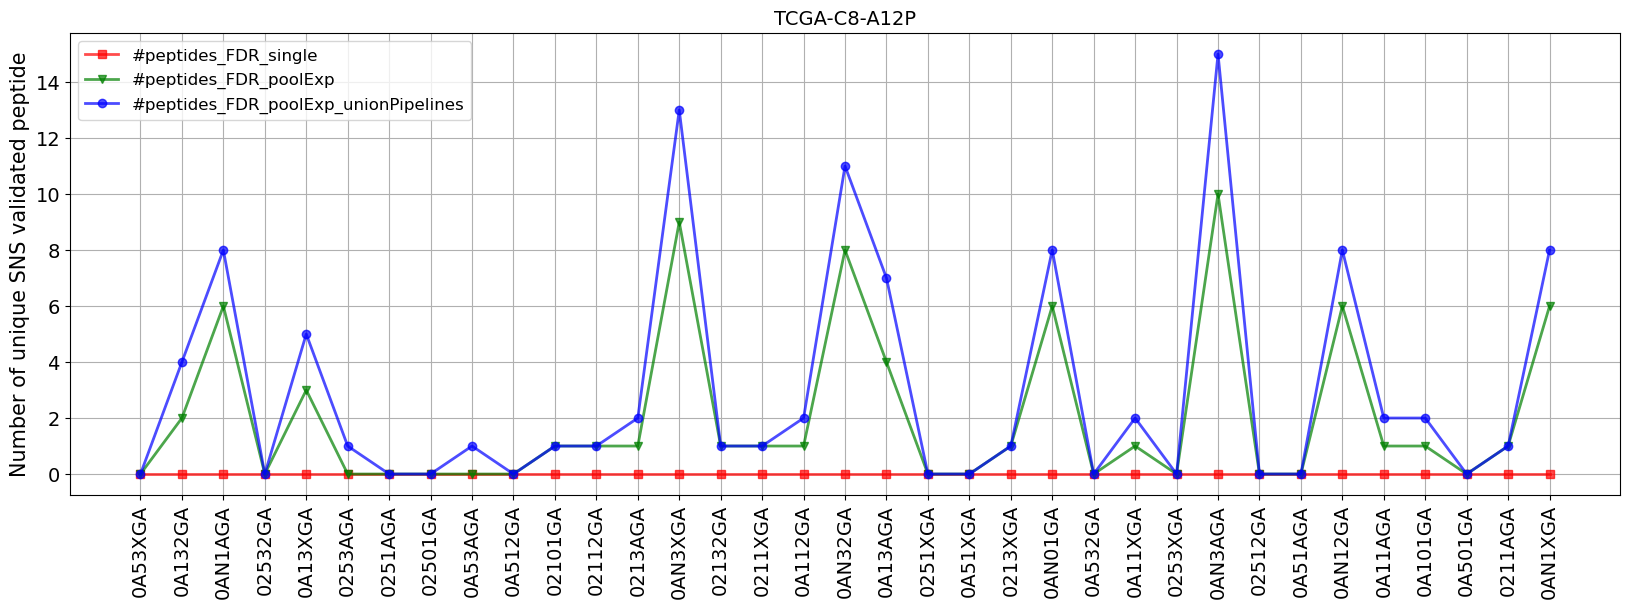

Compare_SNSmethods_TCGA-C8-A12P_ETH_FDR5%.pdf


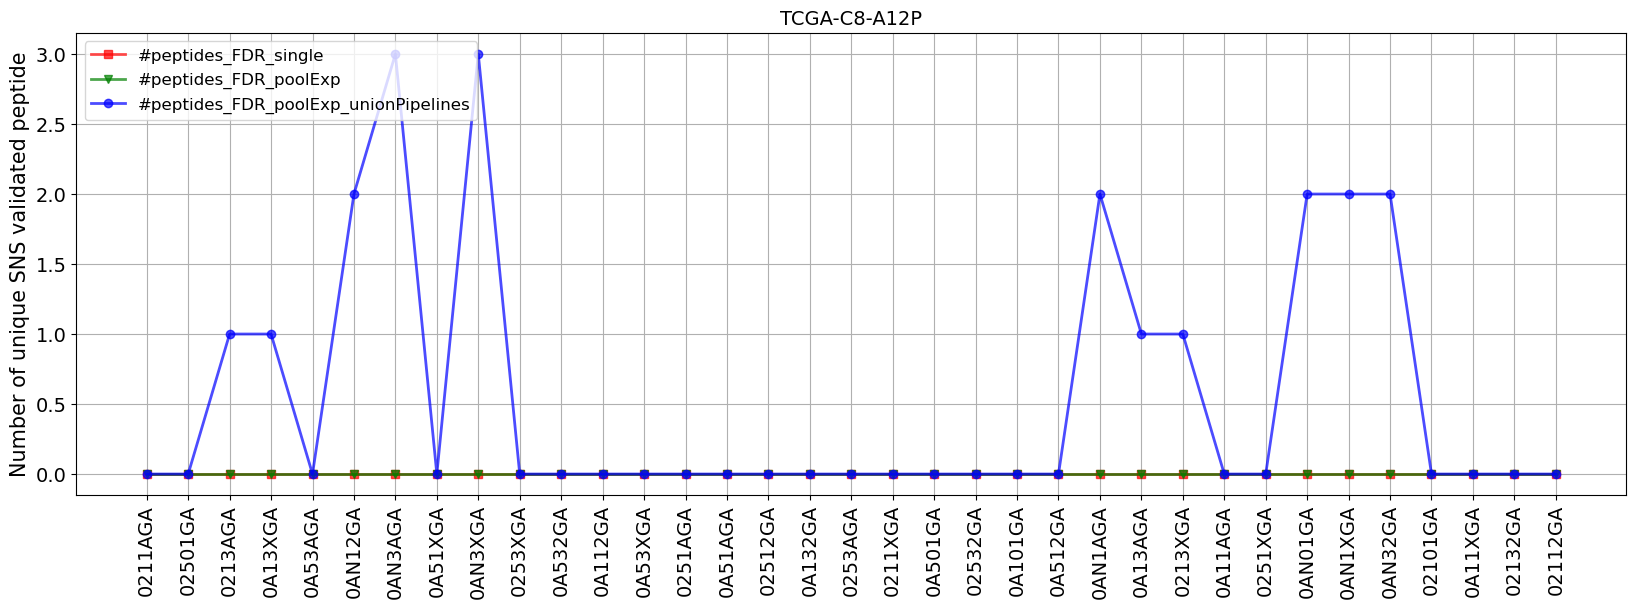

Compare_SNSmethods_TCGA-AO-A0JM_OHSU_FDR5%.pdf


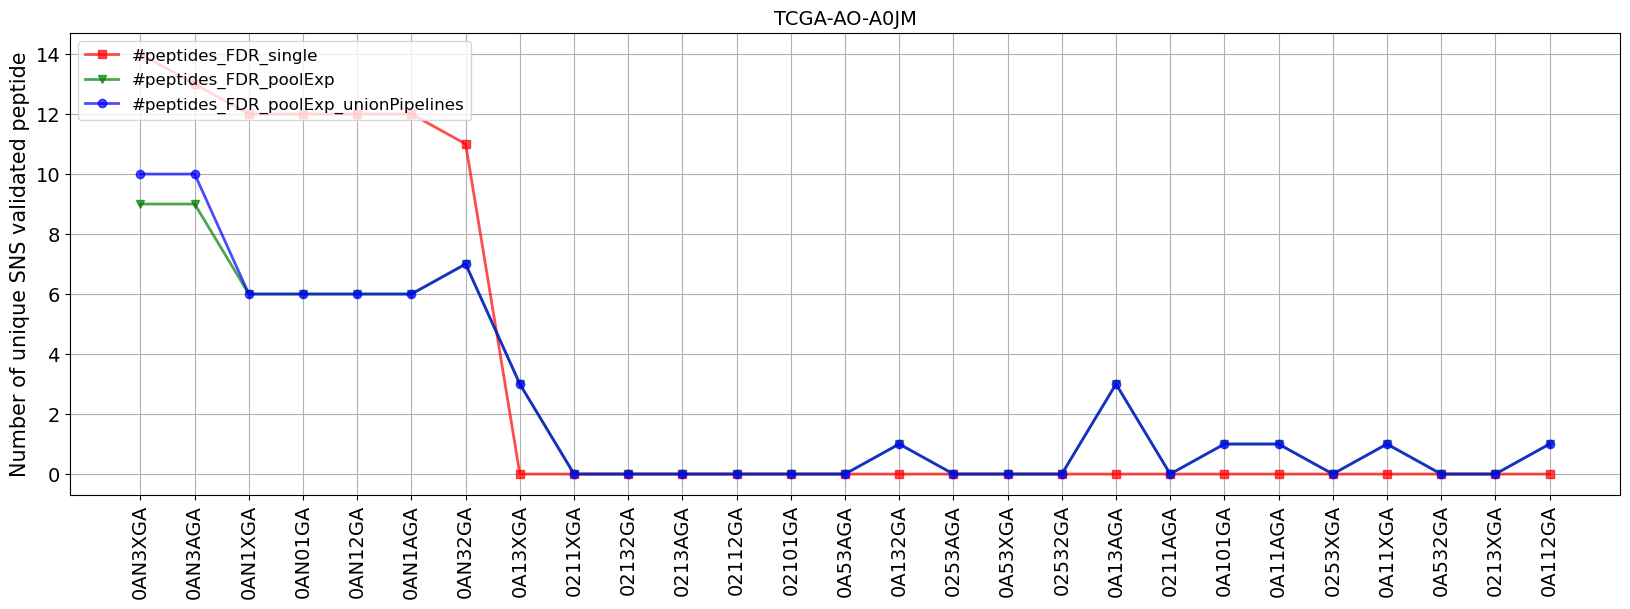

Compare_SNSmethods_TCGA-AO-A0JM_ETH_FDR5%.pdf


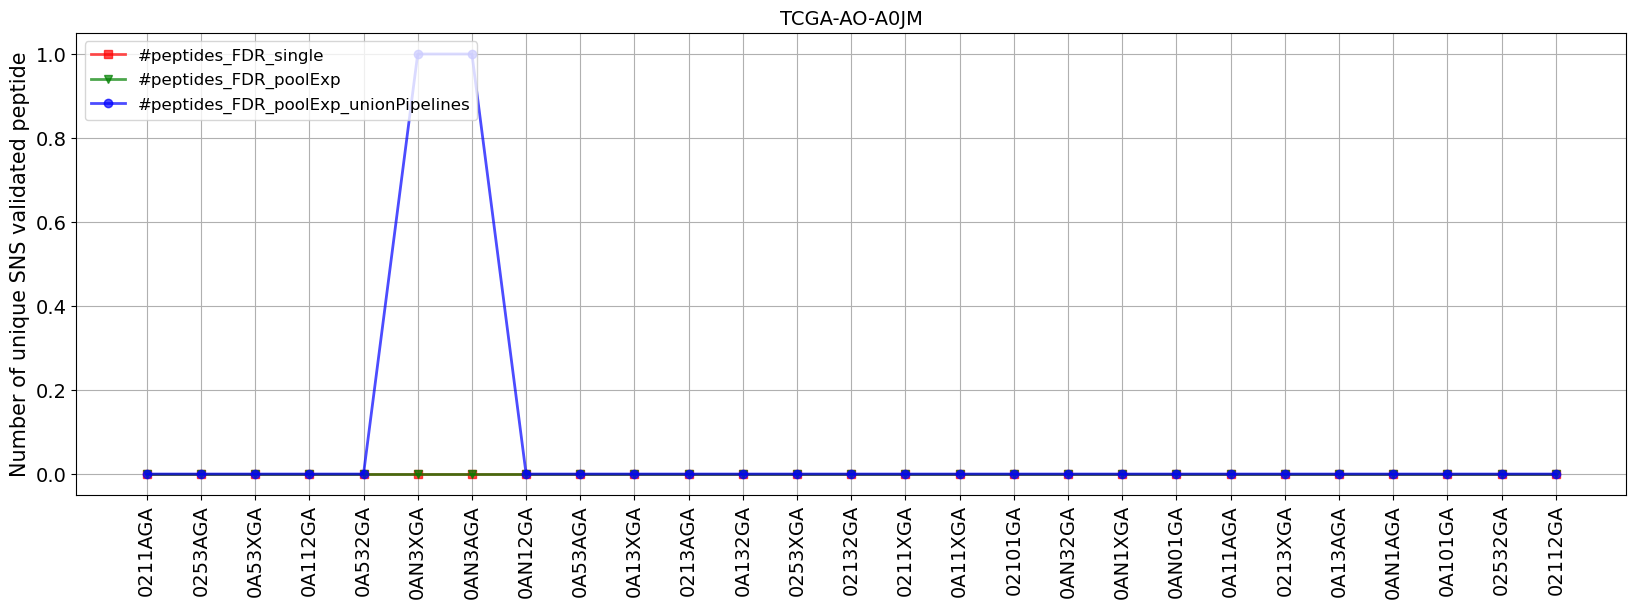

Compare_SNSmethods_TCGA-BH-A18V_OHSU_FDR5%.pdf


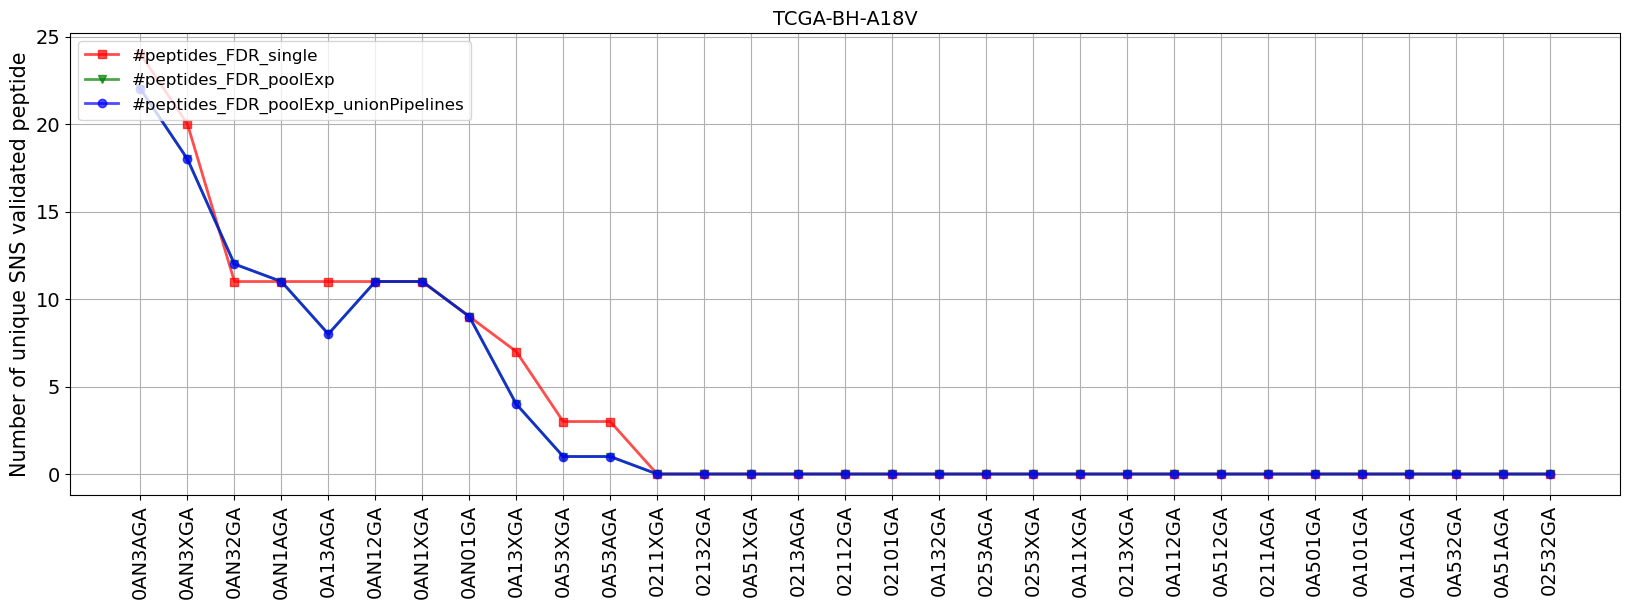

Compare_SNSmethods_TCGA-BH-A18V_ETH_FDR5%.pdf


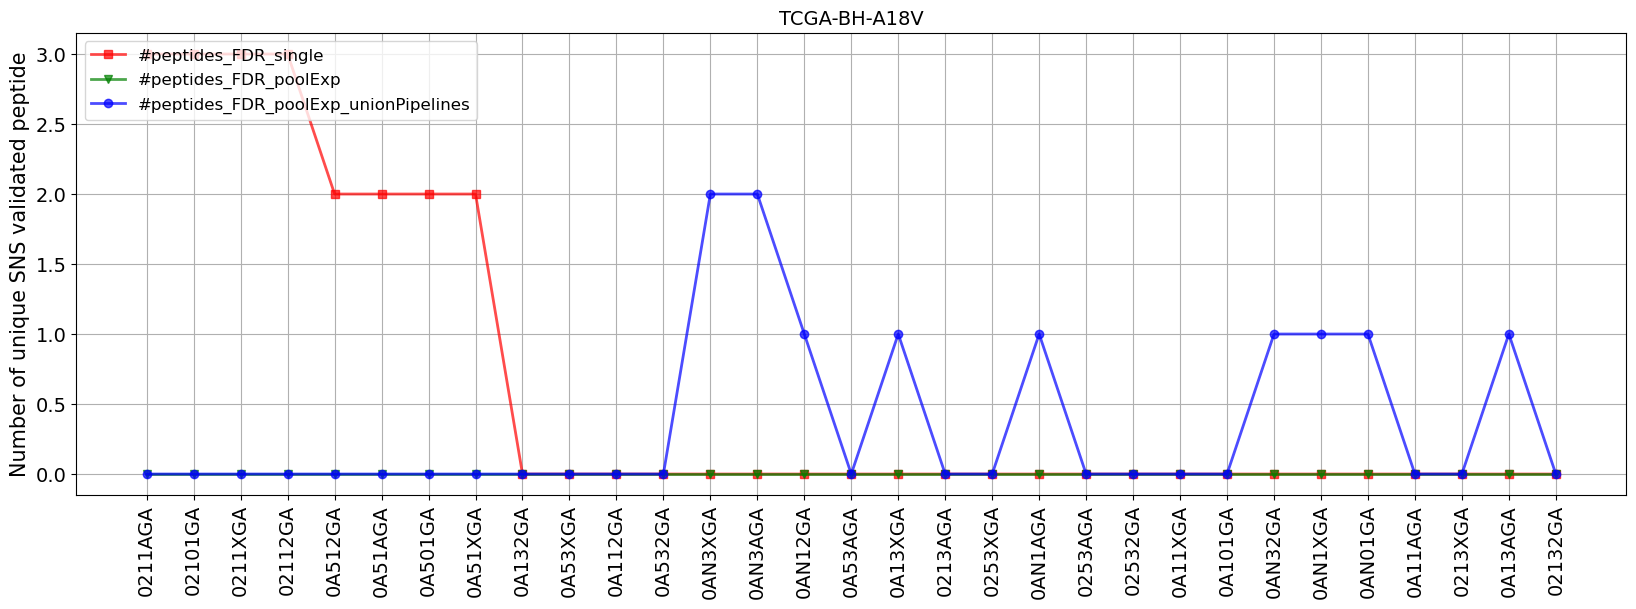

Compare_SNSmethods_TCGA-A2-A0D2_OHSU_FDR5%.pdf


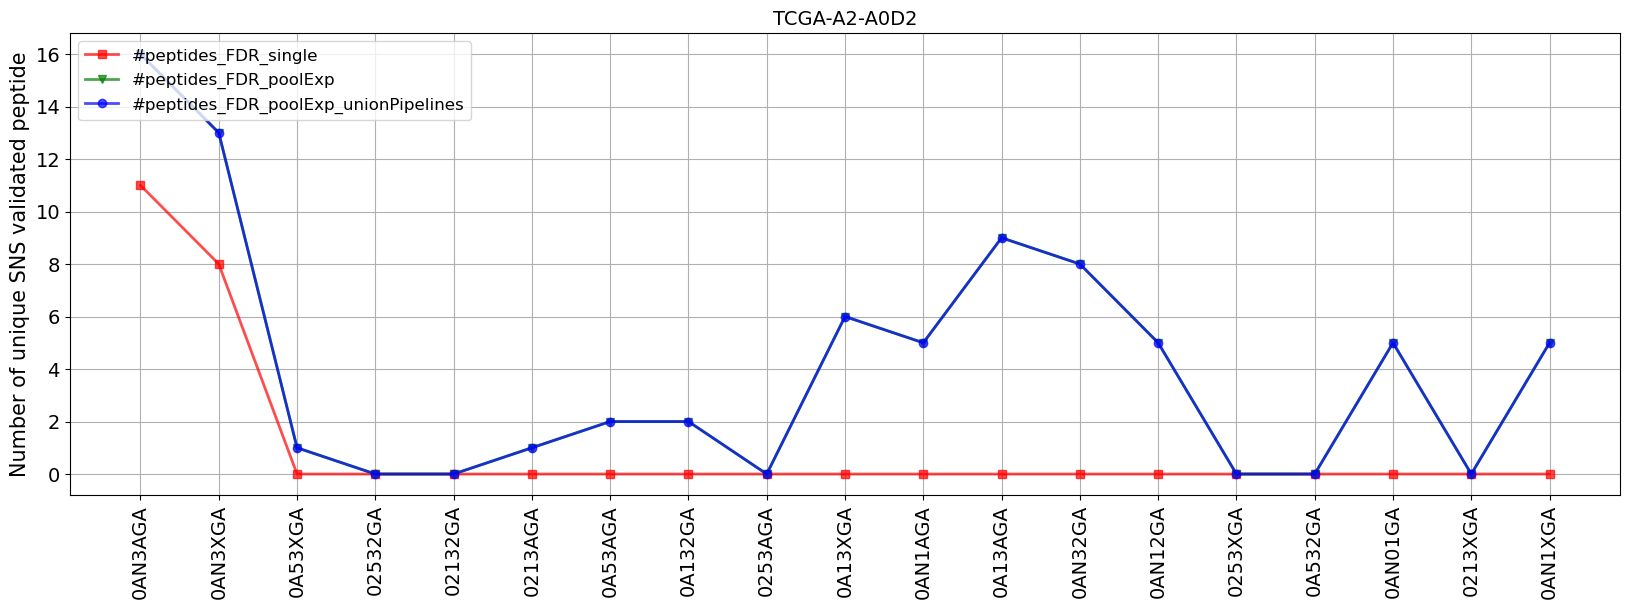

Compare_SNSmethods_TCGA-A2-A0D2_ETH_FDR5%.pdf


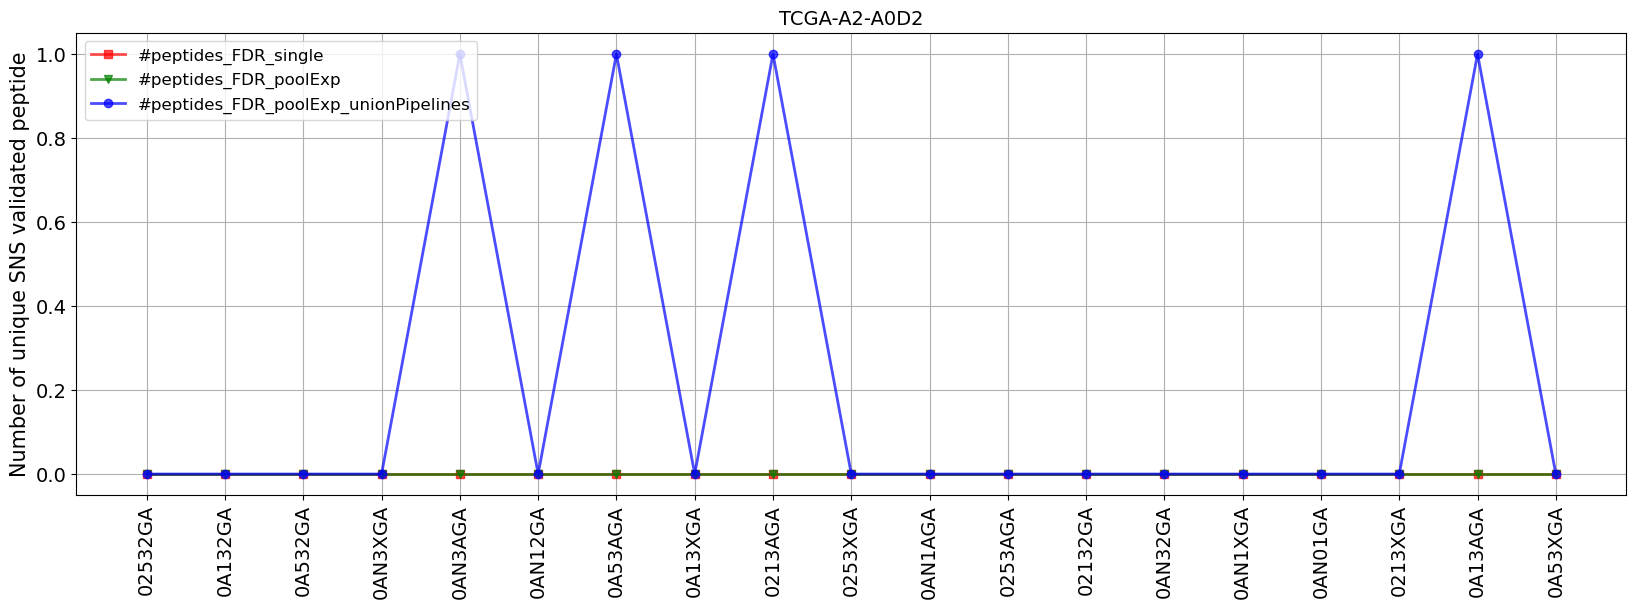

Compare_SNSmethods_TCGA-A2-A0SX_OHSU_FDR5%.pdf


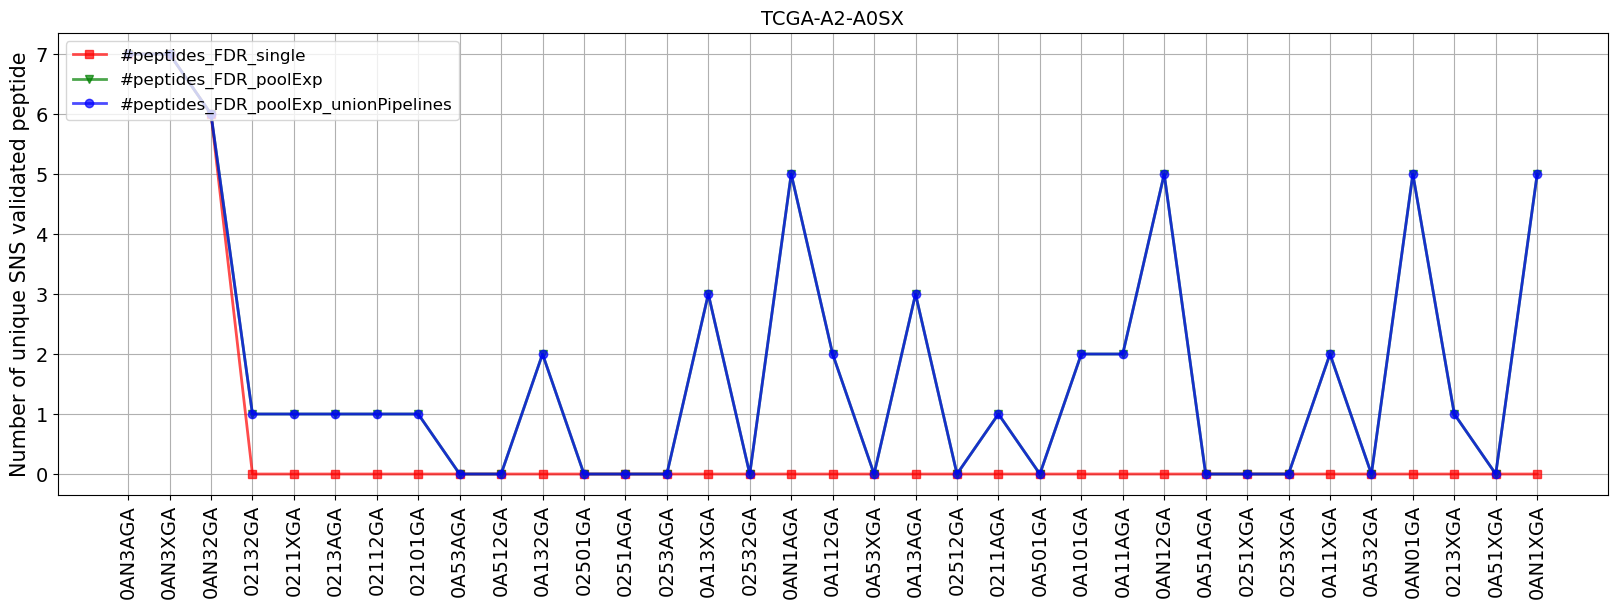

Compare_SNSmethods_TCGA-A2-A0SX_ETH_FDR5%.pdf


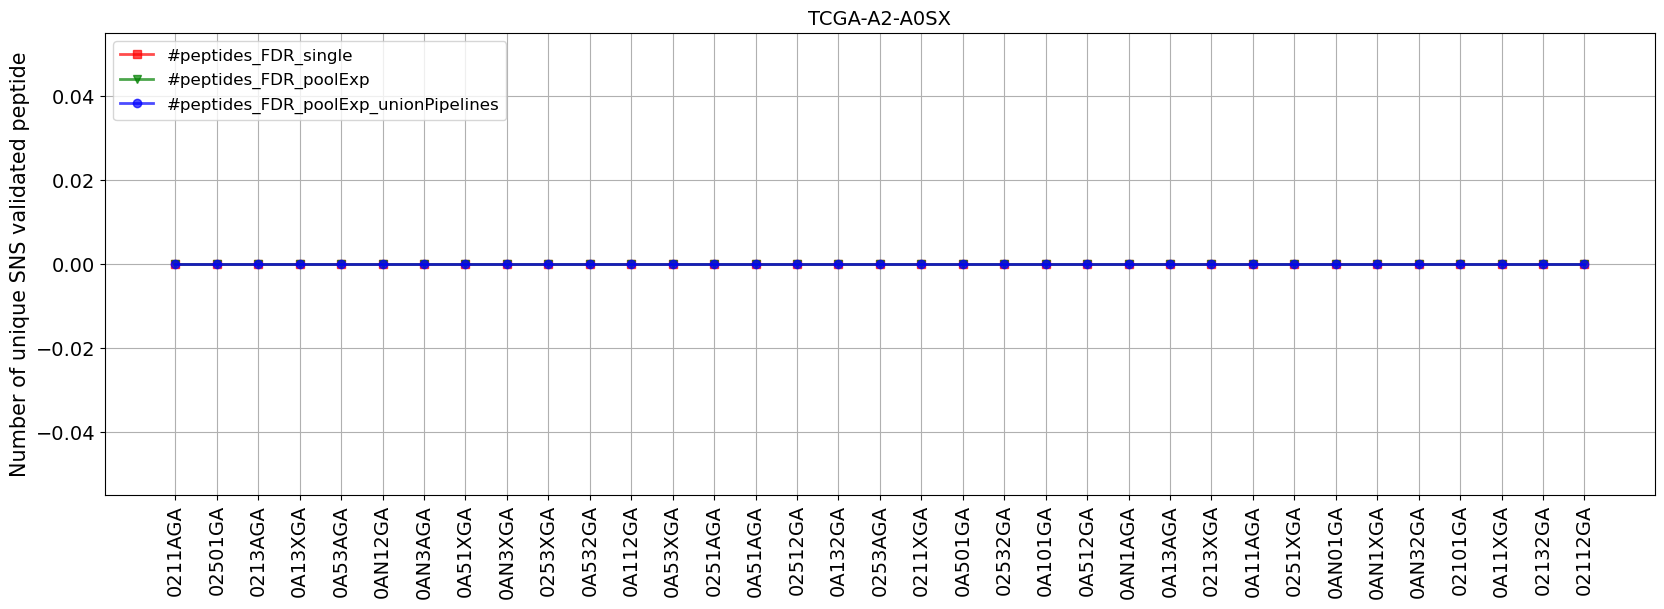

Compare_SNSmethods_TCGA-25-1319_OHSU_FDR5%.pdf


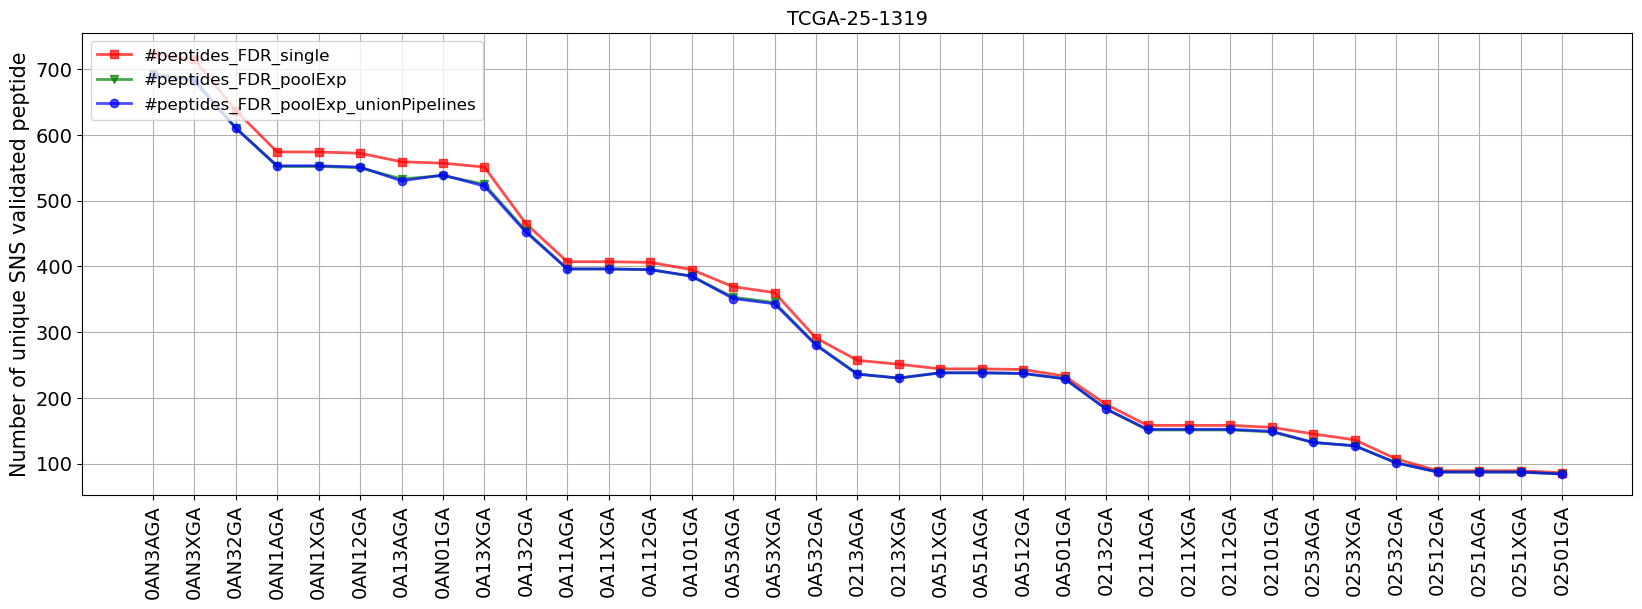

Compare_SNSmethods_TCGA-25-1319_ETH_FDR5%.pdf


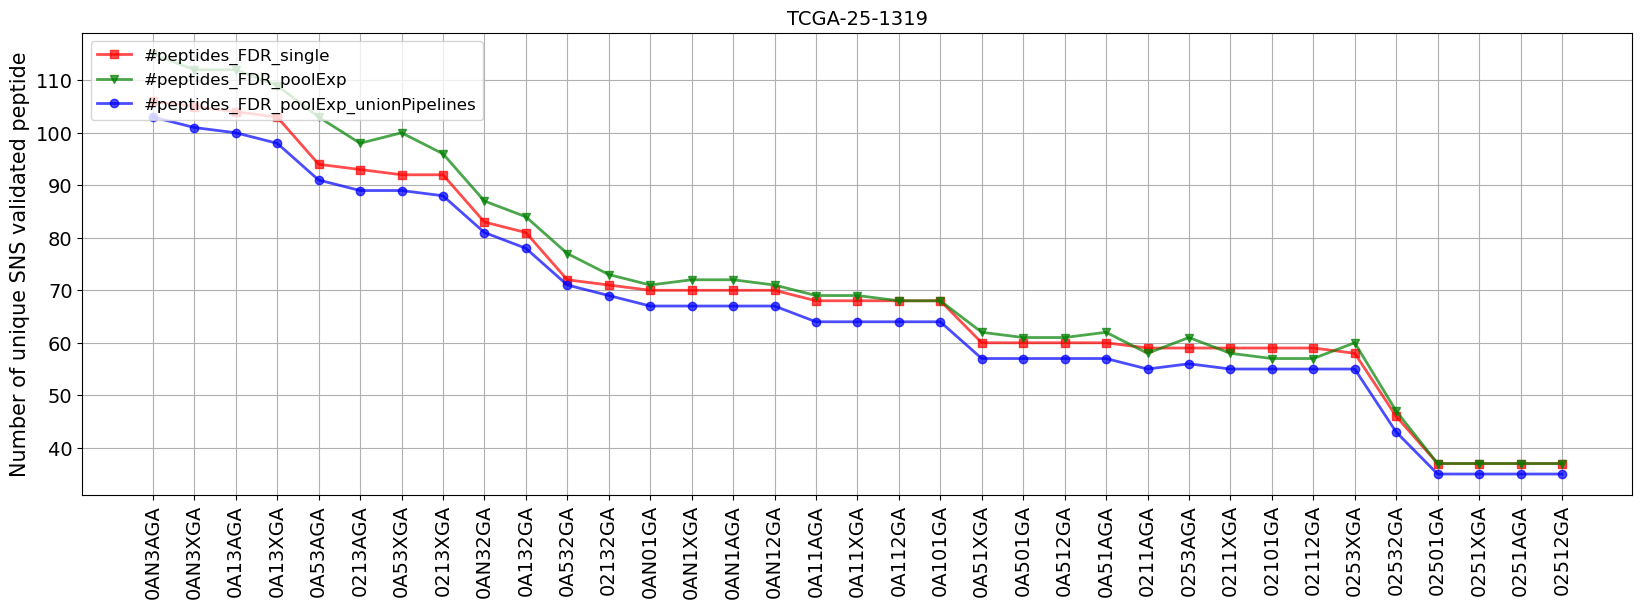

Compare_SNSmethods_TCGA-25-1313_OHSU_FDR5%.pdf


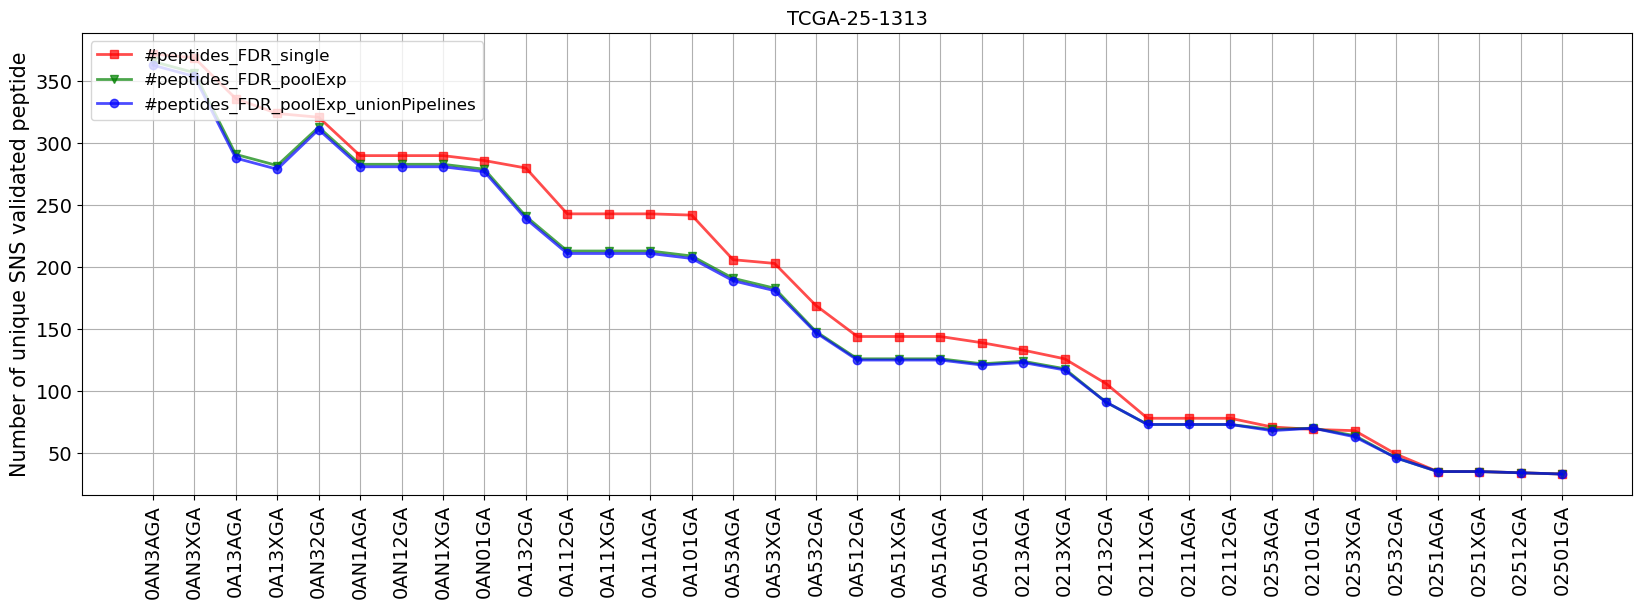

Compare_SNSmethods_TCGA-25-1313_ETH_FDR5%.pdf


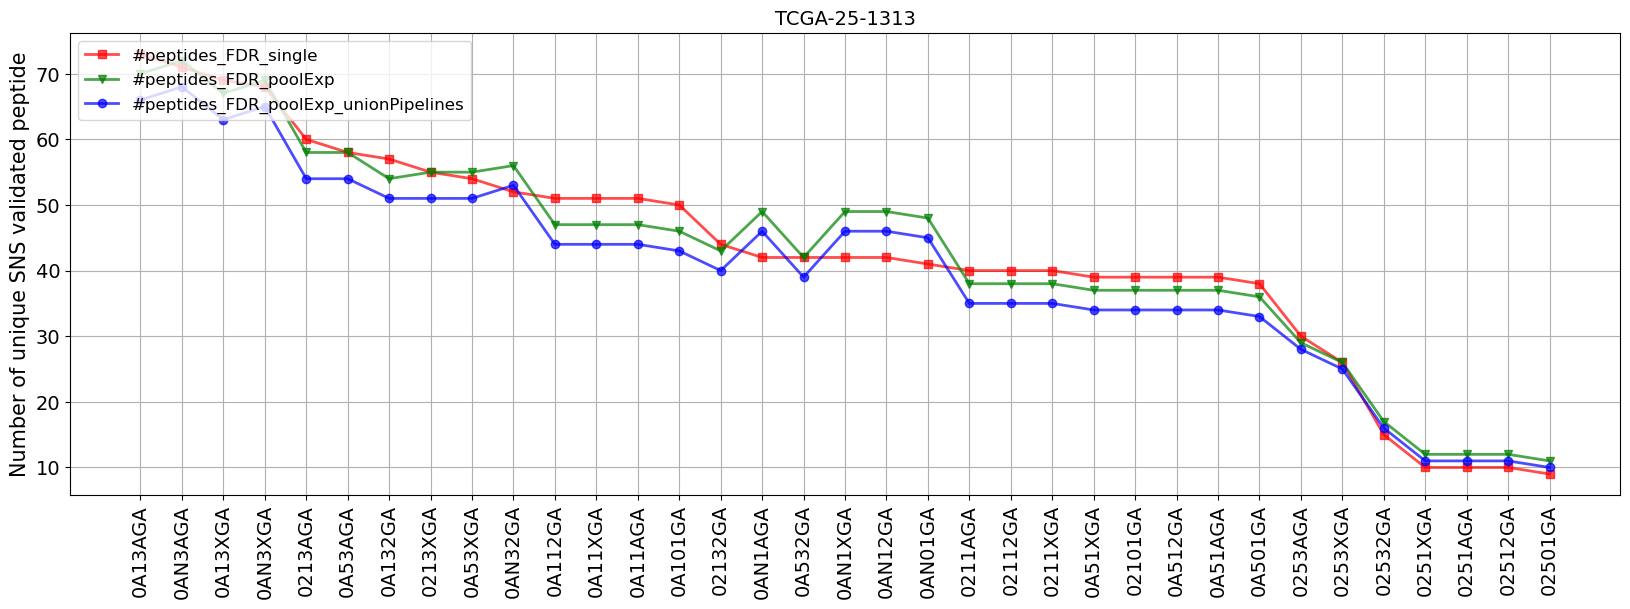

Compare_SNSmethods_TCGA-61-2008_OHSU_FDR5%.pdf


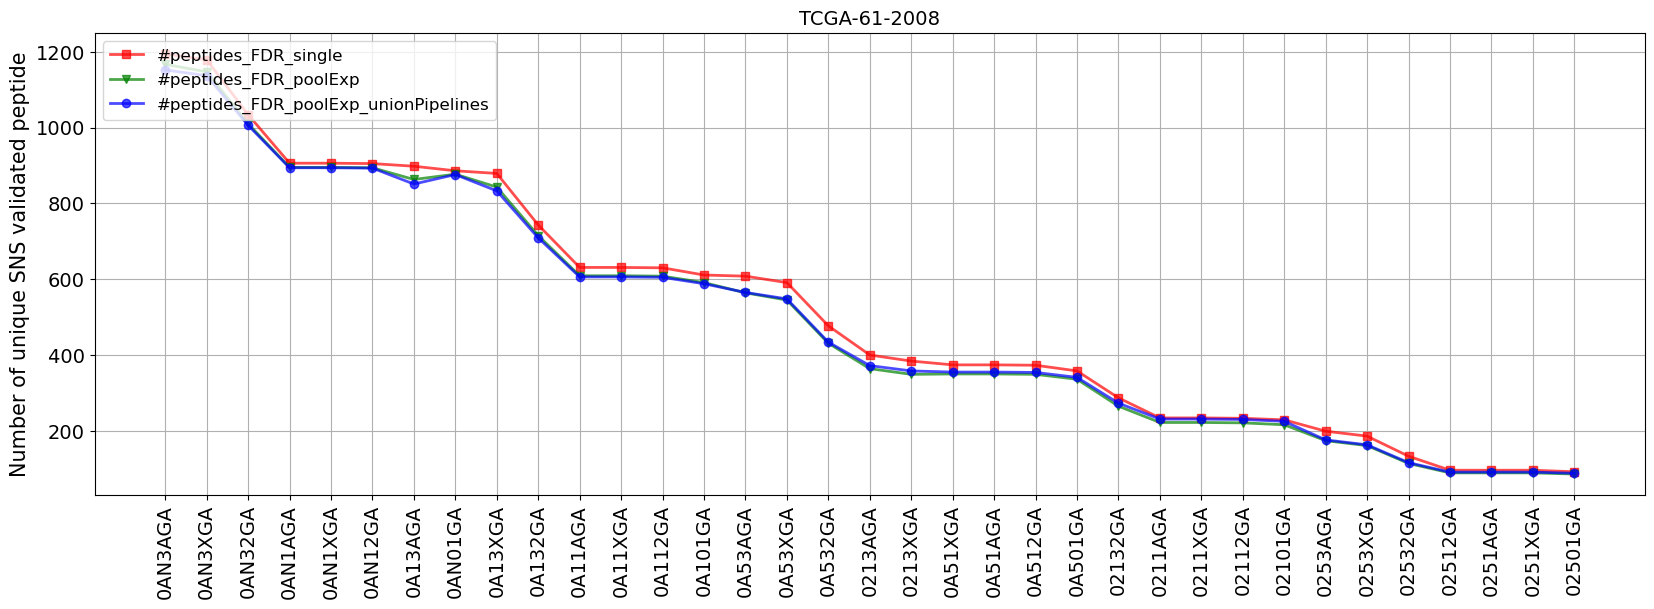

Compare_SNSmethods_TCGA-61-2008_ETH_FDR5%.pdf


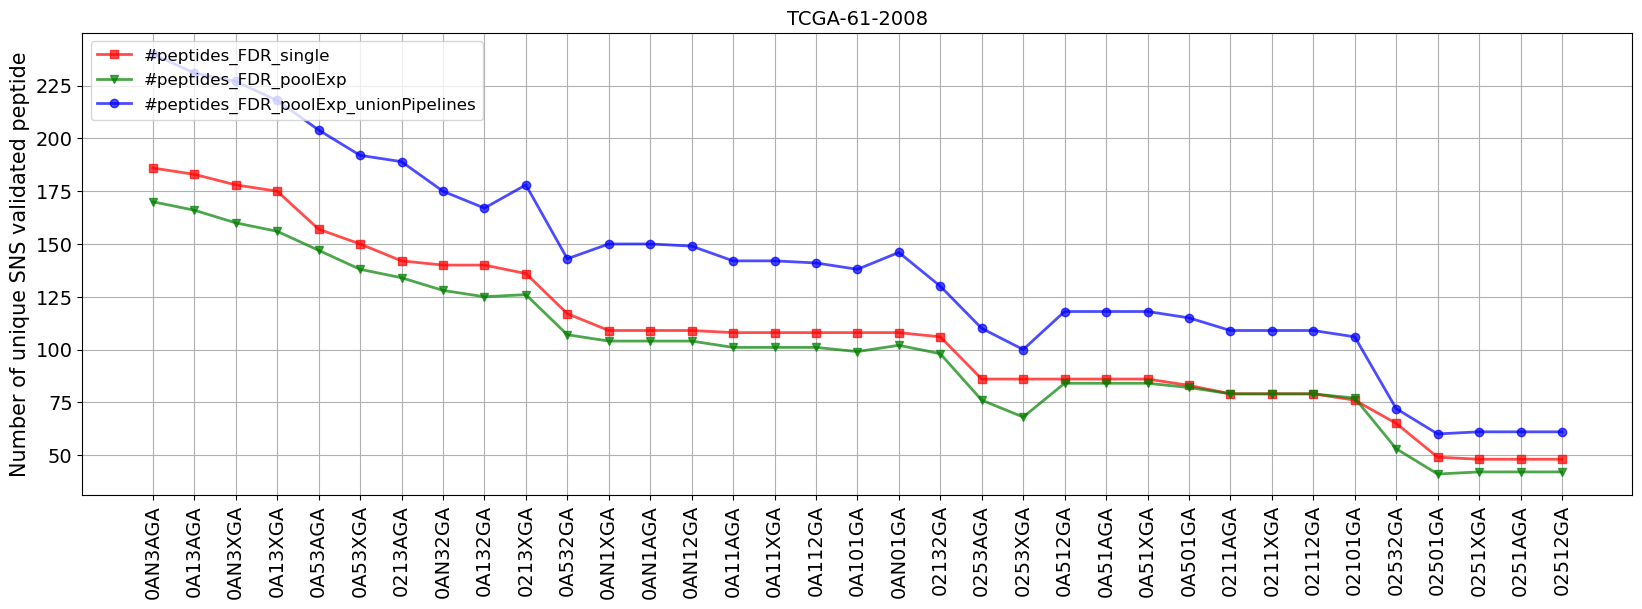

Compare_SNSmethods_TCGA-24-1431_OHSU_FDR5%.pdf


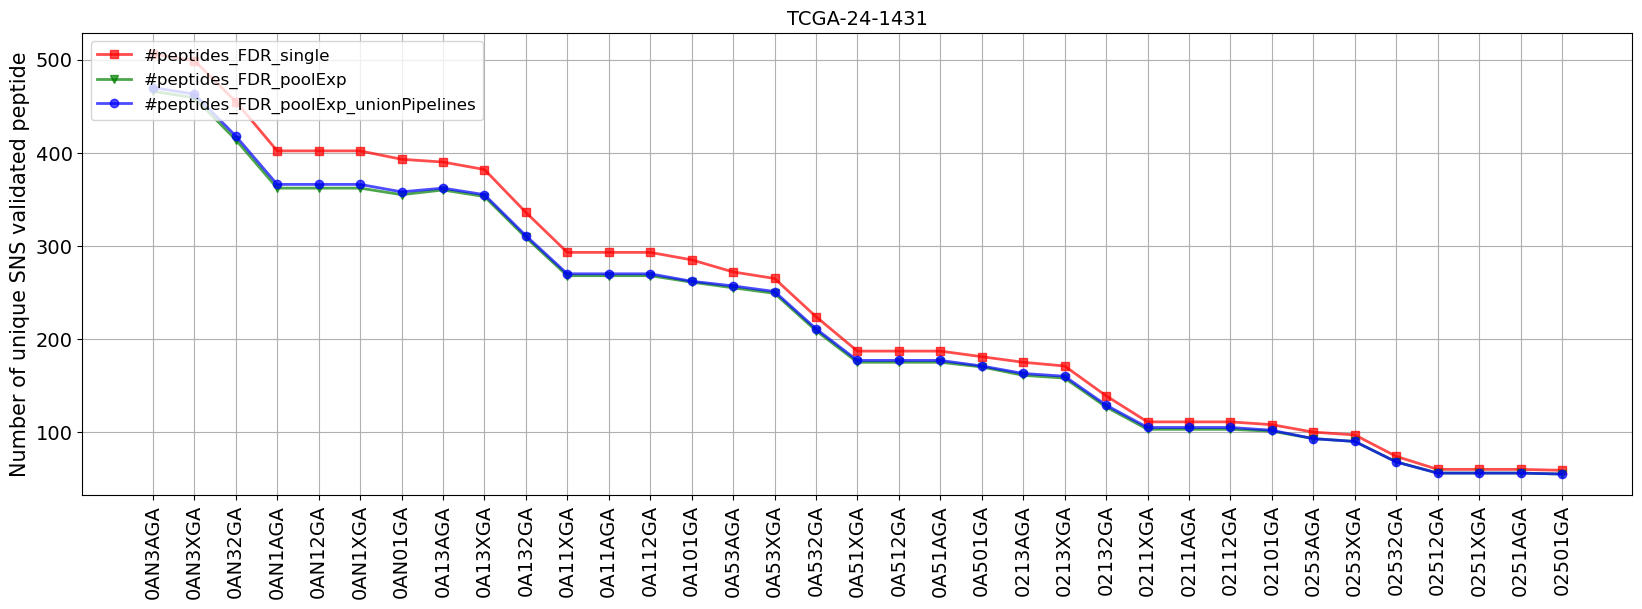

Compare_SNSmethods_TCGA-24-1431_ETH_FDR5%.pdf


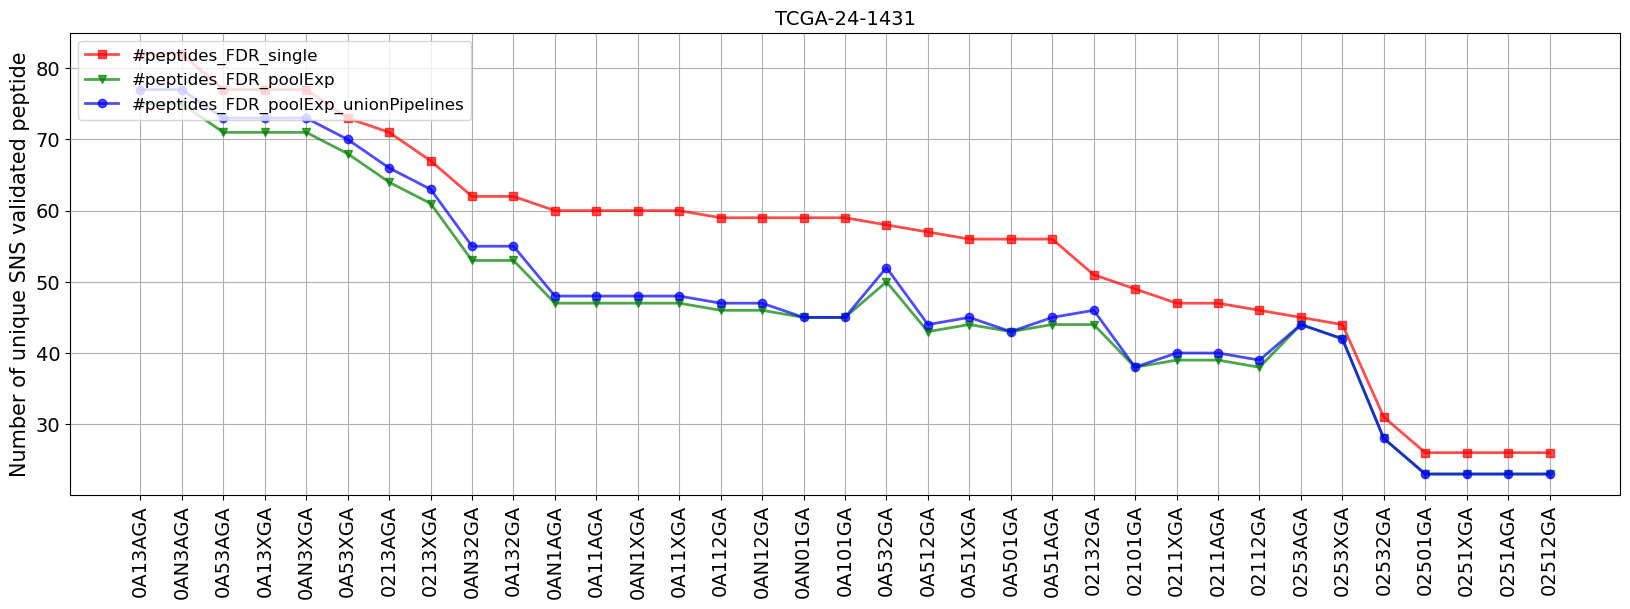

Compare_SNSmethods_TCGA-24-2298_OHSU_FDR5%.pdf


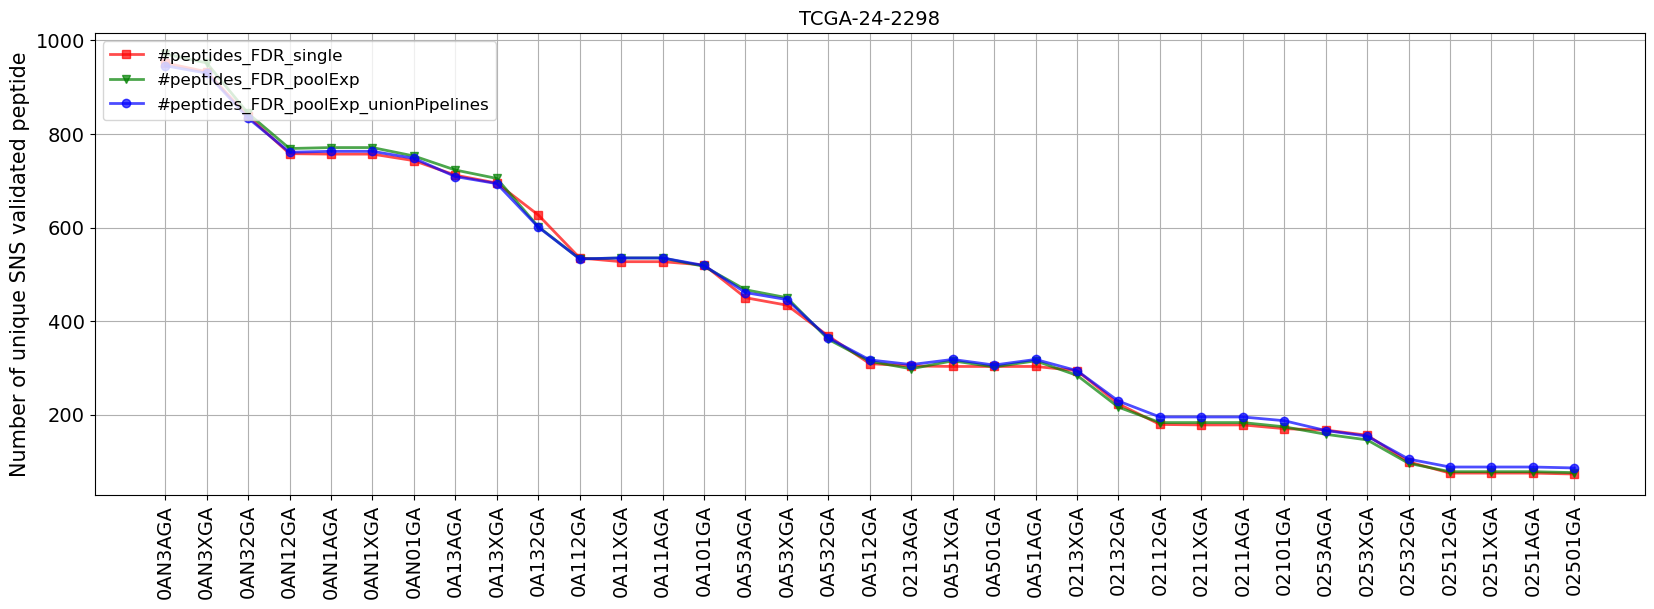

Compare_SNSmethods_TCGA-24-2298_ETH_FDR5%.pdf


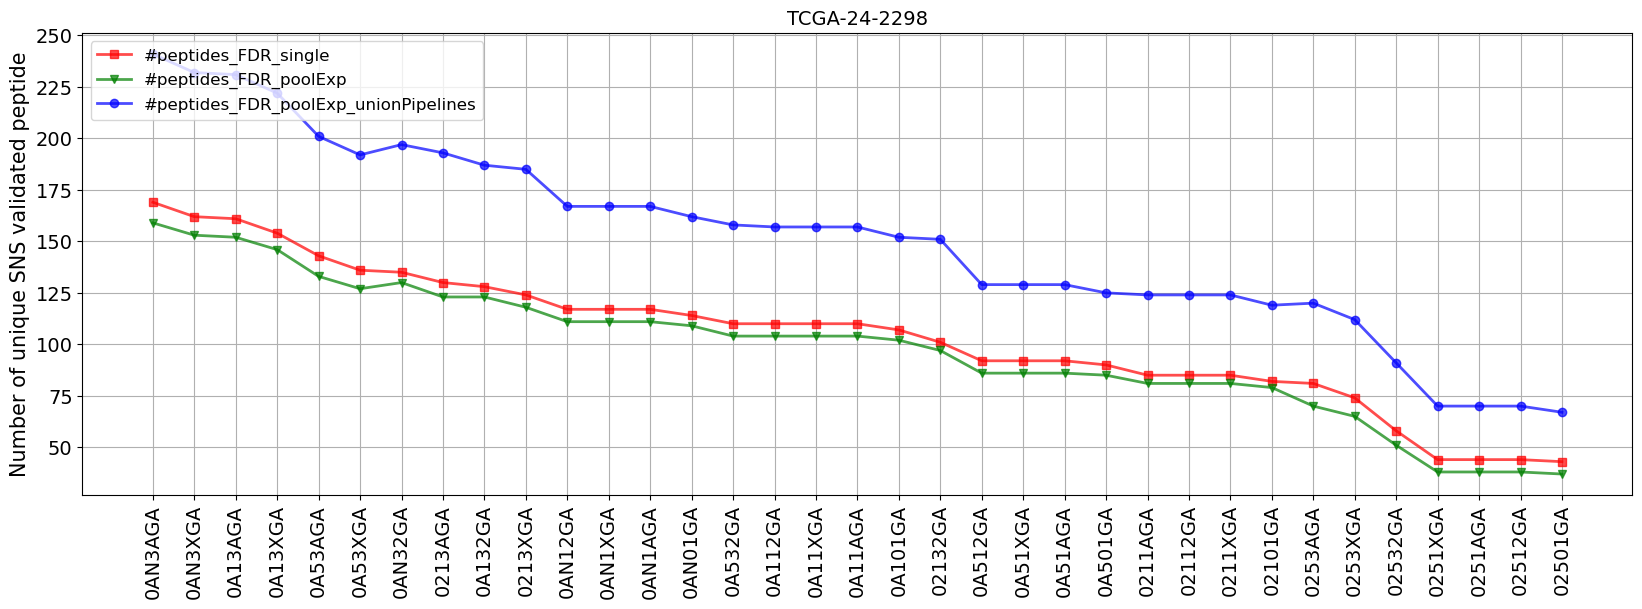

In [85]:
for sample in samples:
    sample = '-'.join(sample.split('-')[0:3])
    for pipeline in pipelines:
        df_plot = pd.DataFrame(results)
        df_plot = df_plot.loc[df_plot['sample'] == sample]

        df_plot = df_plot.loc[df_plot['pipeline'] == pipeline]
        df_plot = df_plot.sort_values('#peptides_FDR_single', ascending=False)
        barplot_3_lines(df_plot, 
               col1='#peptides_FDR_single', 
               col2='#peptides_FDR_poolExp', 
               col3='#peptides_FDR_poolExp_unionPipelines', 
               x_var='experiment', 
               sample_type=sample, 
               save_suffix=f'{pipeline}_FDR{int(FDR_limit*100)}%', 
               base_plot='', 
               save=False)

In [9]:
# TODO what about OHSU experiments which are not shared?

In [ ]:
#TODO: understand which experiments are the most lenient, and how this is linked to validation 

# Parse: Intermediate step

In [79]:
# INPUTS
samples = ['TCGA-C8-A12P-01A-11R-A115-07',
          'TCGA-AO-A0JM-01A-21R-A056-07',
          'TCGA-BH-A18V-01A-11R-A12D-07',
          'TCGA-A2-A0D2-01A-21R-A034-07',
          'TCGA-A2-A0SX-01A-12R-A084-07', 
          'TCGA-25-1319-01A-01R-1565-13',
          'TCGA-25-1313-01A-01R-1565-13',
          'TCGA-61-2008-01A-02R-1568-13',
          'TCGA-24-1431-01A-01R-1566-13',
          'TCGA-24-2298-01A-01R-1569-13']
#samples = samples[-2:]
FDR_Threshold = 0.05

In [80]:
prep_set = {'#number of validated peptides':[], 'pipeline_compared' : [], 'set_type' : [], 'sample':[]}

for sample in samples:
    sample = '-'.join(sample.split('-')[0:3])
    print(sample)

    # Extract 
    OHSU_pool = os.path.join(basedir, f'OHSU/{sample}/tide_search/assign-confidence.target.txt')
    ETH_pool = os.path.join(basedir, f'ETH/{sample}/tide_search/assign-confidence.target.txt')
    join_pool = os.path.join(basedir, f'tide_search_joint/{sample}/assign-confidence.target.txt')
    _, _, OHSU_pool = reader_assign_conf(OHSU_pool, FDR_Threshold)
    _, _, ETH_pool = reader_assign_conf(ETH_pool, FDR_Threshold)
    _, _, join_pool = reader_assign_conf(join_pool, FDR_Threshold)

    # Make Set
    OHSU_pool_peptides = set(OHSU_pool['unmodified sequence'].unique())
    ETH_pool_peptides = set(ETH_pool['unmodified sequence'].unique())
    join_pool_peptides = set(join_pool['unmodified sequence'].unique())

    # Get plotting data 
    print('set sizes')
    val = len(OHSU_pool_peptides)
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU')
    prep_set['set_type'].append('per pipeline (pooled experiments)')
    prep_set['sample'].append(sample)
    print(val)

    val = len(ETH_pool_peptides)
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH')
    prep_set['set_type'].append('per pipeline (pooled experiments)')
    prep_set['sample'].append(sample)
    print(val)

    val = len(join_pool_peptides)

    print('Shared discoveries ETH, OHSU')
    val = len(join_pool_peptides.intersection(OHSU_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU')
    prep_set['set_type'].append('`union of 2 pipelines` & per pipeline')
    prep_set['sample'].append(sample)
    print(val)


    val = len(join_pool_peptides.intersection(ETH_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH')
    prep_set['set_type'].append('`union of 2 pipelines` & per pipeline')
    prep_set['sample'].append(sample)
    print(val)


    print('Missing discoveries from Union')
    val = len(OHSU_pool_peptides.difference(join_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU')
    prep_set['set_type'].append('Loss of peptides in union (per pipeline \ `union of 2 pipelines`)')
    prep_set['sample'].append(sample)
    print(val)

    val = len(ETH_pool_peptides.difference(join_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH')
    prep_set['set_type'].append('Loss of peptides in union (per pipeline \ `union of 2 pipelines`)')
    prep_set['sample'].append(sample)
    print(val)



    val = len(OHSU_pool_peptides.intersection(ETH_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH and OHSU')
    prep_set['set_type'].append('per pipeline OHSU & per pipeline ETH')
    prep_set['sample'].append(sample)
    print(val)
    val_inter = val
    val_inter_OHSU_ETH = OHSU_pool_peptides.intersection(ETH_pool_peptides)


    print('Additional discoveries running Union')
    val = len(join_pool_peptides.difference(ETH_pool_peptides).difference(OHSU_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU or ETH')
    prep_set['set_type'].append('New finds in union (`union of 2 pipelines` \ ETH per pipeline \ OHSU per pipeline)')
    prep_set['sample'].append(sample)
    print(val)







TCGA-C8-A12P
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/tide_search/assign-confidence.target.txt
With Shape: 194669
Number of validated psm: (241, 17)
Number of validated unique peptides: 73
Validation Rate: 1.36 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/tide_search/assign-confidence.target.txt
With Shape: 6633
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/tide_search_joint/TCGA-C8-A12P/assign-confidence.target.txt
With Shape: 195618
Number of validated psm: (292, 17)
Number of validated unique peptides: 91
Validation Rate: 1.69 percent
set sizes
73
0
Shared discoveries ETH, OHSU
73
0
Missing discoveries from Union
0
0
0
Additional discoveries running Union
18
TCGA-AO-A0JM
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/tide_search/assign-conf

With Shape: 110198
Number of validated psm: (690, 17)
Number of validated unique peptides: 201
Validation Rate: 2.46 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/tide_search_joint/TCGA-24-2298/assign-confidence.target.txt
With Shape: 132713
Number of validated psm: (3280, 17)
Number of validated unique peptides: 1292
Validation Rate: 2.89 percent
set sizes
1340
201
Shared discoveries ETH, OHSU
1272
188
Missing discoveries from Union
68
13
183
Additional discoveries running Union
8


In [81]:
for k, v in prep_set.items():
    print(k)
    print(len(v))

#number of validated peptides
80
pipeline_compared
80
set_type
80
sample
80


In [82]:


df_plot.head()

,#number of validated peptides,pipeline_compared,set_type,sample
72,1140,OHSU,per pipeline (pooled experiments),TCGA-24-2298
73,162,ETH,per pipeline (pooled experiments),TCGA-24-2298
74,1068,OHSU,`union of 2 pipelines` & per pipeline,TCGA-24-2298
75,159,ETH,`union of 2 pipelines` & per pipeline,TCGA-24-2298
76,72,OHSU,Loss of peptides in union (per pipeline \ `uni...,TCGA-24-2298


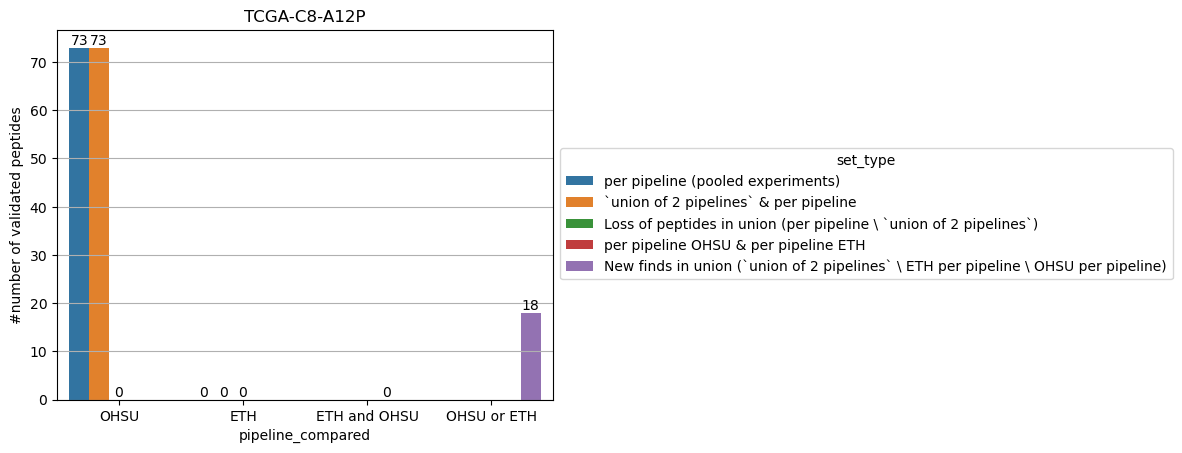

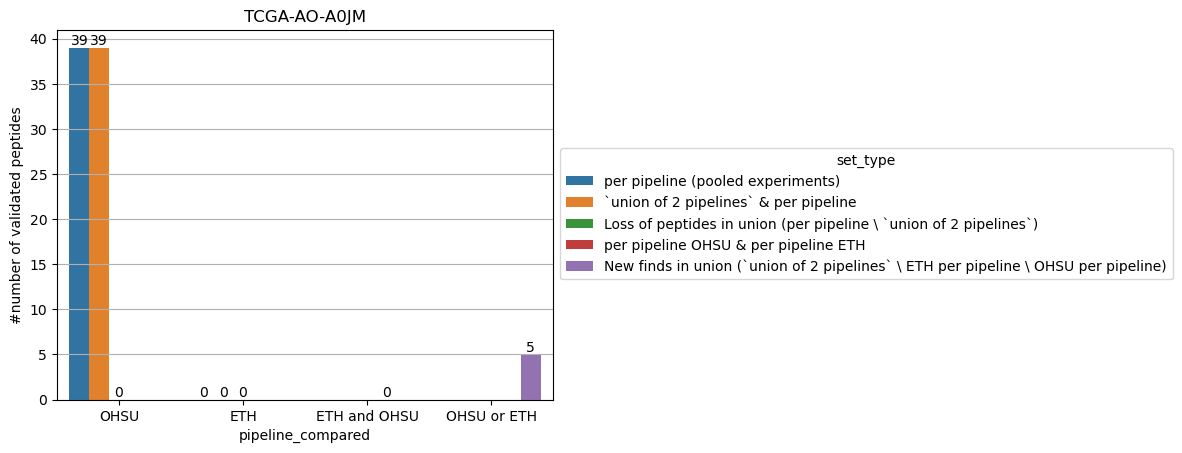

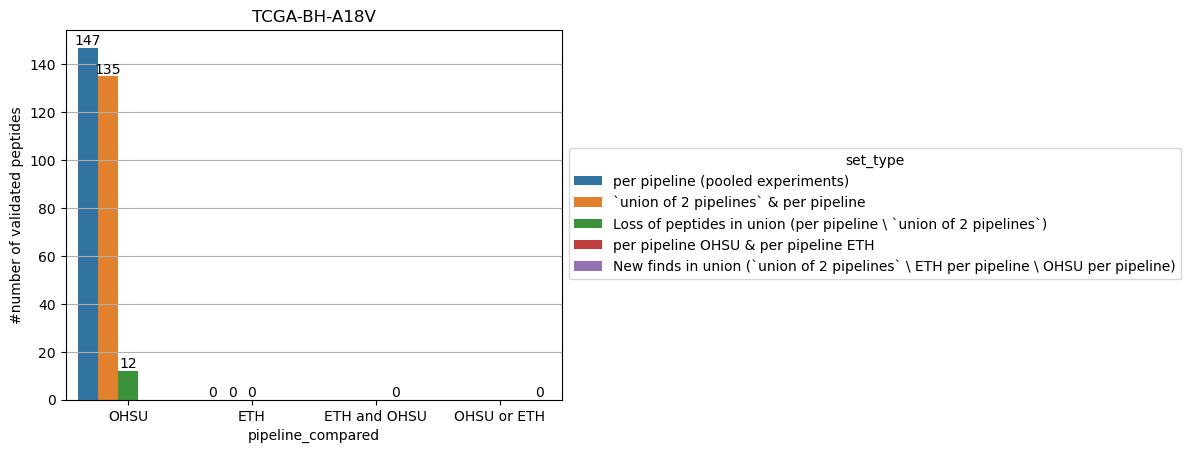

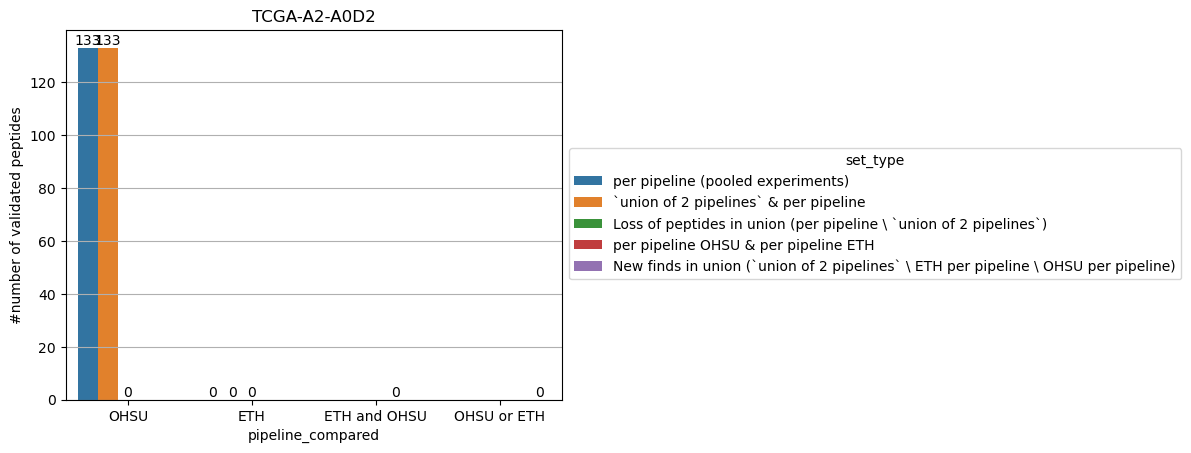

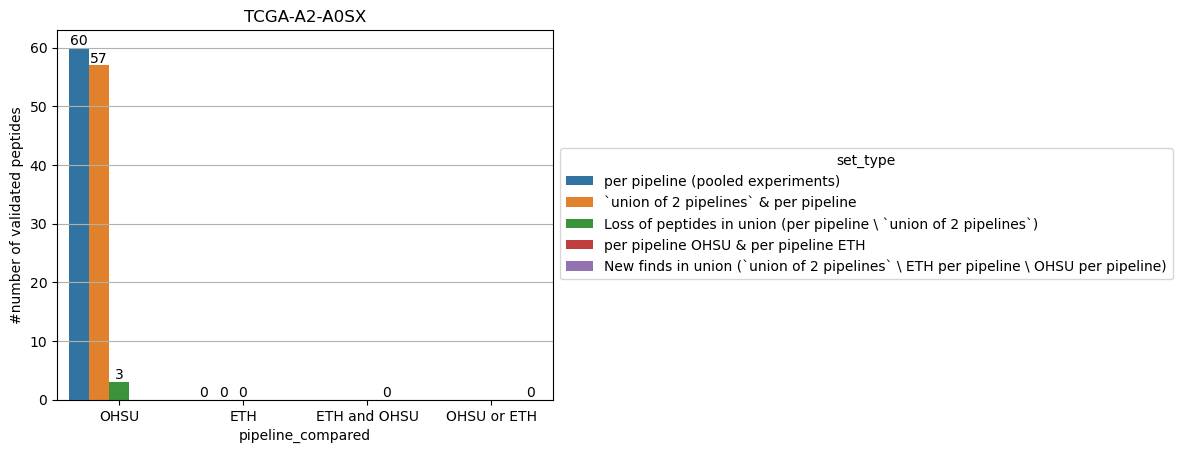

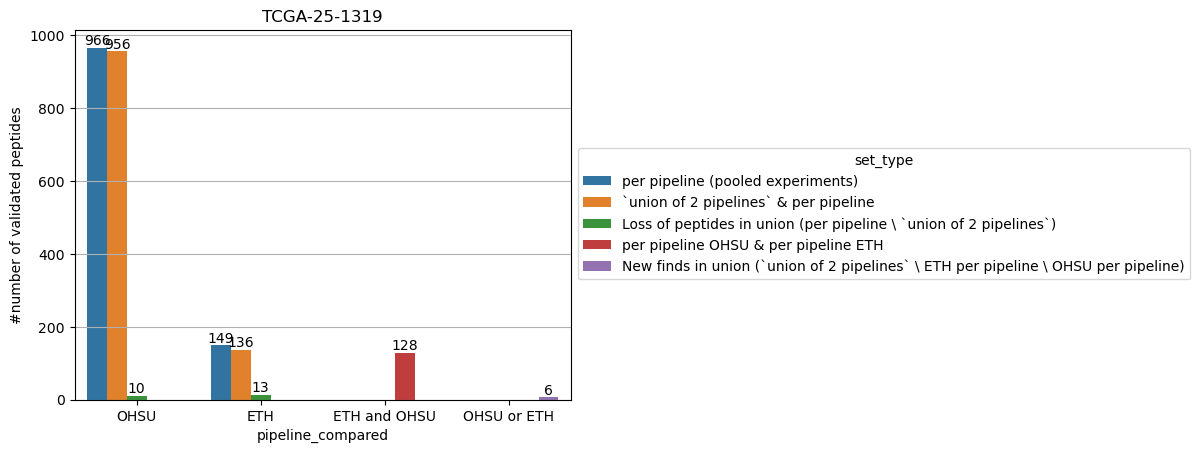

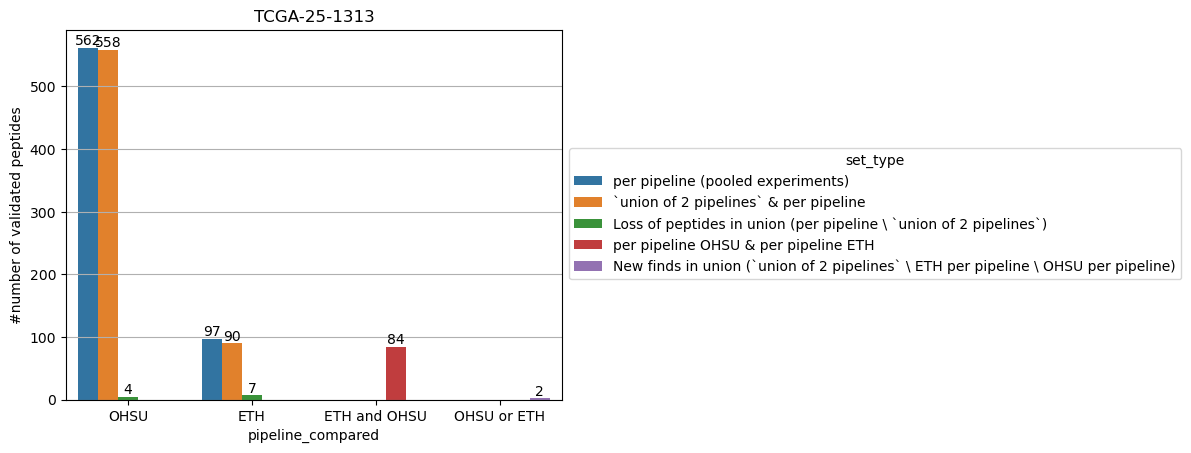

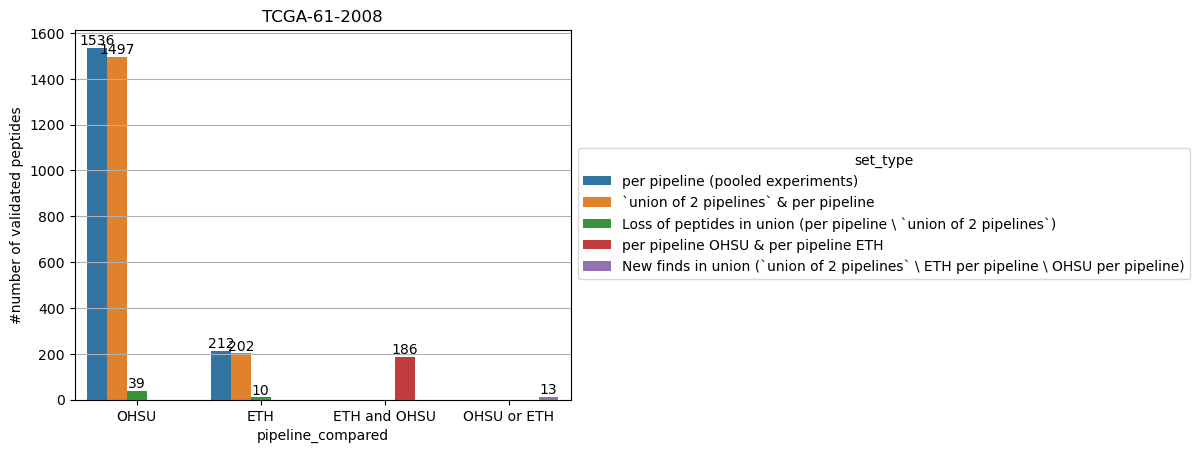

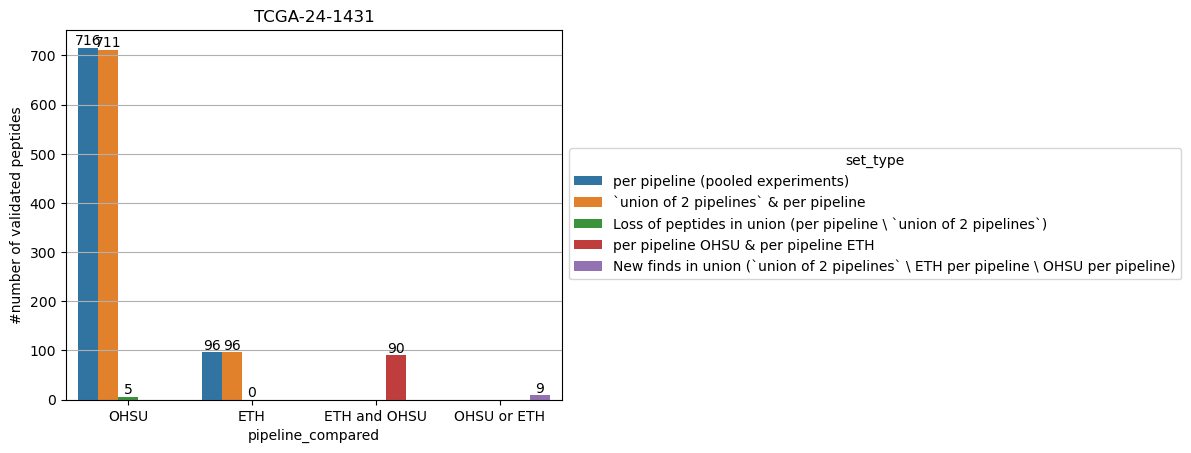

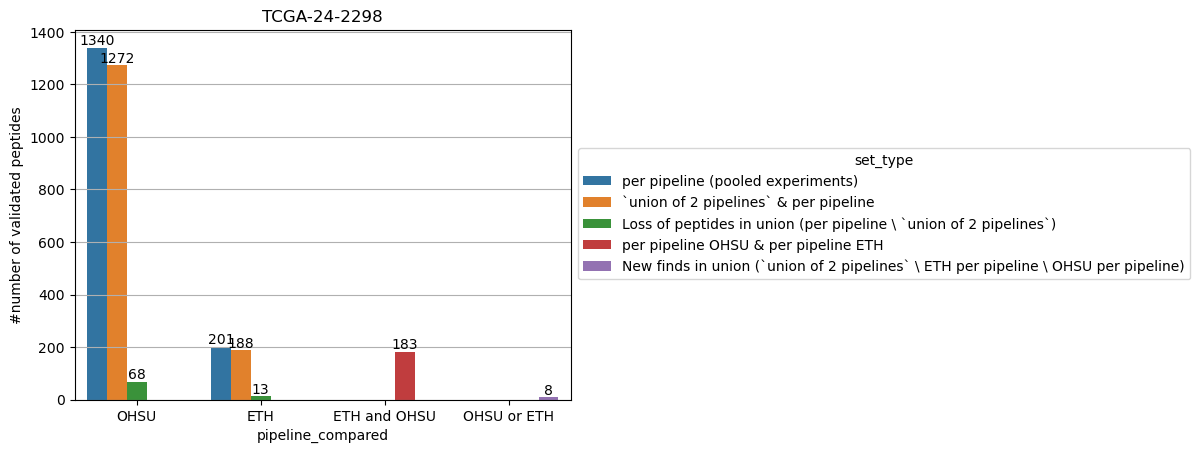

In [83]:
for sample in samples:
    df_plot = pd.DataFrame(prep_set)
    sample = '-'.join(sample.split('-')[0:3])
    
    df_plot = df_plot.loc[df_plot['sample'] == sample]
    plt.title(sample)
    plt.grid()

    ax = sns.barplot(df_plot, y = '#number of validated peptides', x = 'pipeline_compared', hue = 'set_type' )
    for i in ax.containers:
        ax.bar_label(i,)

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, .7))
    plt.show()